In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Set device to CUDA if available, else CPU

from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

import random

from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive to access the dataset

torch.manual_seed(9)
np.random.seed(9)
random.seed(9)

Mounted at /content/drive


Image shape: 1x28x28

In [2]:
# Load and process data

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/EnglishCharactersNoSplit.npz') as data:
    X_en = data['X']
    y_en = data['y']

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/ArabicCharacters.npz') as data:
    X_ar = data['X']
    y_ar = data['y']

with np.load('/content/drive/My Drive/CS539: Handwritten Letter Language Classifier/data/processed/RussianCharacters.npz') as data:
    X_rn = data['X']
    y_rn = data['y']

# Connor's Path
# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/EnglishCharactersNoSplit.npz') as data:
#   X_en = data['X']
#   y_en = data['y']

# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/ArabicCharacters.npz') as data:
#   X_ar = data['X']
#   y_ar = data['y']

# with np.load('/content/drive/My Drive/School/Senior Year (2023-2024)/Fall Semester/CS539/RussianCharacters.npz') as data:
#   X_rn = data['X']
#   y_rn = data['y']


en_num_classes = 26 #number of letters to consider
ar_num_classes = 28
rn_num_classes = 33
total_num_classes = en_num_classes + ar_num_classes + rn_num_classes # 87

### SEPERATE ENSEMBLE CNN METHOD ###

X_train_en, X_val_en, y_train_en, y_val_en = train_test_split(X_en, y_en, test_size=0.3, shuffle=True, random_state=24, stratify=y_en)
X_val_en, X_test_en, y_val_en, y_test_en = train_test_split(X_val_en, y_val_en, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_en)

X_train_ar, X_val_ar, y_train_ar, y_val_ar = train_test_split(X_ar, y_ar, test_size=0.3, shuffle=True, random_state=24, stratify=y_ar)
X_val_ar, X_test_ar, y_val_ar, y_test_ar = train_test_split(X_val_ar, y_val_ar, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_ar)

X_train_rn, X_val_rn, y_train_rn, y_val_rn = train_test_split(X_rn, y_rn, test_size=0.3, shuffle=True, random_state=24, stratify=y_rn)
X_val_rn, X_test_rn, y_val_rn, y_test_rn = train_test_split(X_val_rn, y_val_rn, test_size=0.5, shuffle=True, random_state=24, stratify=y_val_rn)

print("----Seperate CNN datasets info:\n\n")

print("--Language EN:\n")
print("X_train_en & y_train_en shape: ", X_train_en.shape, y_train_en.shape)
print("X_val_en & y_val_en shape: ", X_val_en.shape, y_val_en.shape)
print("X_test_en & y_test_en shape: ", X_test_en.shape, y_test_en.shape)

print("\n--Language AR:\n")
print("X_train_ar & y_train_ar shape: ", X_train_ar.shape, y_train_ar.shape)
print("X_val_ar & y_val_ar shape: ", X_val_ar.shape, y_val_ar.shape)
print("X_test_ar & y_test_ar shape: ", X_test_ar.shape, y_test_ar.shape)

print("\n--Language RN:\n")
print("X_train_rn & y_train_rn shape: ", X_train_rn.shape, y_train_rn.shape)
print("X_val_rn & y_val_rn shape: ", X_val_rn.shape, y_val_rn.shape)
print("X_test_rn & y_test_rn shape: ", X_test_rn.shape, y_test_rn.shape)

print("\n\n")

### COMBINED CNN METHOD ###

X = torch.cat((torch.tensor(X_en), torch.tensor(X_ar), torch.tensor(X_rn)))

# make datasets 87 hot for combination
en_zeros = np.array([0.] * (total_num_classes - en_num_classes))
y_en_87_hot = torch.tensor(np.array([np.append(y_en[i], en_zeros) for i in range(len(y_en))])).float()

ar_zeros_front = np.array([0.] * en_num_classes)
ar_zeros_end = np.array([0.] * (total_num_classes - en_num_classes - ar_num_classes))
y_ar_87_hot = torch.tensor(np.array([np.append(np.append(ar_zeros_front, y_ar[i]), ar_zeros_end) for i in range(len(y_ar))])).float()

rn_zeros = np.array([0.] * (total_num_classes - rn_num_classes))
y_rn_87_hot = torch.tensor(np.array([np.append(rn_zeros, y_rn[i]) for i in range(len(y_rn))])).float()

y = torch.cat((y_en_87_hot, y_ar_87_hot, y_rn_87_hot))

print("----Combined CNN dataset info:\n\n")
print("X shape: ", X.shape)
print("y shape: ", y.shape, end='\n\n')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=24, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, shuffle=True, random_state=24, stratify=y_val)

print("X_train & y_train shape: ", X_train.shape, y_train.shape)
print("X_val & y_val shape: ", X_val.shape, y_val.shape)
print("X_test & y_test shape: ", X_test.shape, y_test.shape)

----Seperate CNN datasets info:


--Language EN:

X_train_en & y_train_en shape:  (4781, 28, 28, 1) (4781, 26)
X_val_en & y_val_en shape:  (1025, 28, 28, 1) (1025, 26)
X_test_en & y_test_en shape:  (1025, 28, 28, 1) (1025, 26)

--Language AR:

X_train_ar & y_train_ar shape:  (6102, 28, 28, 1) (6102, 28)
X_val_ar & y_val_ar shape:  (1308, 28, 28, 1) (1308, 28)
X_test_ar & y_test_ar shape:  (1308, 28, 28, 1) (1308, 28)

--Language RN:

X_train_rn & y_train_rn shape:  (9933, 28, 28, 1) (9933, 33)
X_val_rn & y_val_rn shape:  (2128, 28, 28, 1) (2128, 33)
X_test_rn & y_test_rn shape:  (2129, 28, 28, 1) (2129, 33)



----Combined CNN dataset info:


X shape:  torch.Size([29739, 28, 28, 1])
y shape:  torch.Size([29739, 87])

X_train & y_train shape:  torch.Size([20817, 28, 28, 1]) torch.Size([20817, 87])
X_val & y_val shape:  torch.Size([4461, 28, 28, 1]) torch.Size([4461, 87])
X_test & y_test shape:  torch.Size([4461, 28, 28, 1]) torch.Size([4461, 87])


In [3]:
# create and implement dataset

class LetterDataset(Dataset):
    def __init__(self, dataset, labels):
        self.dataset = dataset
        # Convert one-hot labels to class indices if they are one-hot encoded
        if len(labels.shape) > 1:  # Assuming labels are one-hot encoded if they have more than 1 dimension
            self.labels = np.argmax(labels, axis=1)
        else:
            self.labels = labels

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
        data_tensor = data_tensor.permute(2, 0, 1)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
        return data_tensor, label_tensor

### SEPERATE ENSEMBLE CNN METHOD ###

# en
db_train_en, db_val_en, db_test_en = LetterDataset(X_train_en, y_train_en), LetterDataset(X_val_en, y_val_en), LetterDataset(X_test_en, y_test_en)

# ar
db_train_ar, db_val_ar, db_test_ar = LetterDataset(X_train_ar, y_train_ar), LetterDataset(X_val_ar, y_val_ar), LetterDataset(X_test_ar, y_test_ar)

# rn
db_train_rn, db_val_rn, db_test_rn = LetterDataset(X_train_rn, y_train_rn), LetterDataset(X_val_rn, y_val_rn), LetterDataset(X_test_rn, y_test_rn)

### COMBINED CNN METHOD ###

db_train, db_val, db_test = LetterDataset(X_train, y_train), LetterDataset(X_val, y_val), LetterDataset(X_test, y_test)

In [4]:
### SEPERATE ENSEMBLE CNN METHOD ###

# en
model_en = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, en_num_classes)          # Output layer with `num_classes` outputs
)

model_en_no_trans = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, en_num_classes)          # Output layer with `num_classes` outputs
)

# ar
model_ar = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, ar_num_classes)          # Output layer with `num_classes` outputs
)

model_ar_no_trans = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, ar_num_classes)          # Output layer with `num_classes` outputs
)

# rn
model_rn = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, rn_num_classes)          # Output layer with `num_classes` outputs
)

model_rn_no_trans = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, rn_num_classes)          # Output layer with `num_classes` outputs
)


### COMBINED CNN METHOD ###

model = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, total_num_classes)       # Output layer with `num_classes` outputs
)

model_no_trans = nn.Sequential(
    nn.Conv2d(1, 28, kernel_size=(3,3)),    # First convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(28, 56, kernel_size=(3,3)),   # Second convolutional layer
    nn.ReLU(),                              # Activation function
    nn.Conv2d(56, 112, kernel_size=(4,4)),  # Third convolutional layer
    nn.ReLU(),                              # Activation function
    nn.MaxPool2d(kernel_size=(2,2)),        # Max pooling layer
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Flatten(),                           # Flatten the output for the dense layer
    nn.Linear(11200, 112),                  # Dense layer with adjusted input size
    nn.Dropout(0.25),                       # Dropout for regularization
    nn.Linear(112, total_num_classes)       # Output layer with `num_classes` outputs
)

In [5]:
import tqdm

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.normal_(m, mean=0.0, std=0.02)
        m.bias.data.fill_(0.0)

# previous init_weights -> too small std & no bias assumptions
# def init_weights(model):
#     for m in model.modules():
#         if isinstance(m, (nn.Conv2d, nn.Linear)):
#             nn.init.normal_(m.weight, mean=0, std=0.005)

def accuracy(pred, labels):
    return (pred.argmax(-1) == labels).float().mean()


@torch.no_grad()
def eval(model, loader):
    accuracies = []
    for images, labels in tqdm.tqdm(loader):
        # Prepare data
        images = images.to(device)
        labels = labels.to(device)

        # Compute predictions, loss and accuracy
        pred = model(images)
        acc = accuracy(pred, labels)
        accuracies.append(acc.detach().item())
    return np.mean(accuracies)

def fit_one_epoch(model, opt, loader):
    losses, accuracies = [], []
    for images, labels in tqdm.tqdm(loader):
        # Prepare data
        images = images.to(device)
        labels = labels.to(device)

        # Compute predictions, loss and accuracy
        pred = model(images)
        l = loss(pred, labels)
        acc = accuracy(pred, labels)

        # Compute gradients and update the model
        opt.zero_grad()
        l.backward()
        opt.step()

        losses.append(l.detach().item())
        accuracies.append(acc.detach().item())
    return np.mean(losses), np.mean(accuracies)


def fit(model, loader_train, loader_test, epochs=10):
    opt = torch.optim.Adam(model.parameters(), lr=0.0005)
    hist_tr_loss, hist_tr_acc, hist_te_acc = [], [], []
    for epoch in range(epochs):
        tr_l, tr_acc = fit_one_epoch(model, opt, loader_train)
        te_acc = eval(model, loader_test)

        print(f"Finished epoch {epoch} of {epochs}: Train Loss = {tr_l:.3f}   Train Acc = {tr_acc:.3f}   Test Acc = {te_acc:.3f}", flush=True)
        hist_tr_loss.append(tr_l)
        hist_tr_acc.append(tr_acc)
        hist_te_acc.append(te_acc)
    return hist_tr_loss, hist_tr_acc, hist_te_acc

100%|██████████| 17/17 [00:00<00:00, 196.53it/s]

Finished epoch 0 of 30: Train Loss = 1.618   Train Acc = 0.548   Test Acc = 0.800



100%|██████████| 17/17 [00:00<00:00, 234.60it/s]

Finished epoch 1 of 30: Train Loss = 0.607   Train Acc = 0.829   Test Acc = 0.861



100%|██████████| 17/17 [00:00<00:00, 237.98it/s]

Finished epoch 2 of 30: Train Loss = 0.387   Train Acc = 0.891   Test Acc = 0.896



100%|██████████| 17/17 [00:00<00:00, 246.65it/s]

Finished epoch 3 of 30: Train Loss = 0.284   Train Acc = 0.920   Test Acc = 0.886



100%|██████████| 17/17 [00:00<00:00, 231.38it/s]

Finished epoch 4 of 30: Train Loss = 0.229   Train Acc = 0.933   Test Acc = 0.897



100%|██████████| 17/17 [00:00<00:00, 246.85it/s]

Finished epoch 5 of 30: Train Loss = 0.177   Train Acc = 0.949   Test Acc = 0.904



100%|██████████| 17/17 [00:00<00:00, 244.59it/s]

Finished epoch 6 of 30: Train Loss = 0.150   Train Acc = 0.956   Test Acc = 0.921



100%|██████████| 17/17 [00:00<00:00, 244.12it/s]

Finished epoch 7 of 30: Train Loss = 0.125   Train Acc = 0.960   Test Acc = 0.916



100%|██████████| 17/17 [00:00<00:00, 225.46it/s]

Finished epoch 8 of 30: Train Loss = 0.106   Train Acc = 0.965   Test Acc = 0.916



100%|██████████| 17/17 [00:00<00:00, 238.59it/s]

Finished epoch 9 of 30: Train Loss = 0.087   Train Acc = 0.972   Test Acc = 0.914



100%|██████████| 17/17 [00:00<00:00, 202.38it/s]

Finished epoch 10 of 30: Train Loss = 0.083   Train Acc = 0.972   Test Acc = 0.914



100%|██████████| 17/17 [00:00<00:00, 208.70it/s]

Finished epoch 11 of 30: Train Loss = 0.058   Train Acc = 0.982   Test Acc = 0.859



100%|██████████| 17/17 [00:00<00:00, 194.38it/s]

Finished epoch 12 of 30: Train Loss = 0.059   Train Acc = 0.978   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 182.66it/s]

Finished epoch 13 of 30: Train Loss = 0.065   Train Acc = 0.977   Test Acc = 0.857



100%|██████████| 17/17 [00:00<00:00, 202.95it/s]

Finished epoch 14 of 30: Train Loss = 0.049   Train Acc = 0.981   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 197.44it/s]

Finished epoch 15 of 30: Train Loss = 0.057   Train Acc = 0.982   Test Acc = 0.903



100%|██████████| 17/17 [00:00<00:00, 210.47it/s]

Finished epoch 16 of 30: Train Loss = 0.042   Train Acc = 0.985   Test Acc = 0.910



100%|██████████| 17/17 [00:00<00:00, 215.89it/s]

Finished epoch 17 of 30: Train Loss = 0.055   Train Acc = 0.982   Test Acc = 0.862



100%|██████████| 17/17 [00:00<00:00, 234.98it/s]

Finished epoch 18 of 30: Train Loss = 0.048   Train Acc = 0.983   Test Acc = 0.926



100%|██████████| 17/17 [00:00<00:00, 232.06it/s]

Finished epoch 19 of 30: Train Loss = 0.028   Train Acc = 0.991   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 240.36it/s]

Finished epoch 20 of 30: Train Loss = 0.022   Train Acc = 0.992   Test Acc = 0.857



100%|██████████| 17/17 [00:00<00:00, 236.53it/s]

Finished epoch 21 of 30: Train Loss = 0.034   Train Acc = 0.989   Test Acc = 0.912



100%|██████████| 17/17 [00:00<00:00, 235.07it/s]

Finished epoch 22 of 30: Train Loss = 0.040   Train Acc = 0.988   Test Acc = 0.912



100%|██████████| 17/17 [00:00<00:00, 233.38it/s]

Finished epoch 23 of 30: Train Loss = 0.028   Train Acc = 0.990   Test Acc = 0.869



100%|██████████| 17/17 [00:00<00:00, 95.24it/s]

Finished epoch 24 of 30: Train Loss = 0.034   Train Acc = 0.987   Test Acc = 0.916



100%|██████████| 17/17 [00:00<00:00, 126.98it/s]

Finished epoch 25 of 30: Train Loss = 0.031   Train Acc = 0.989   Test Acc = 0.858



100%|██████████| 17/17 [00:00<00:00, 120.31it/s]

Finished epoch 26 of 30: Train Loss = 0.025   Train Acc = 0.992   Test Acc = 0.920



100%|██████████| 17/17 [00:00<00:00, 237.52it/s]

Finished epoch 27 of 30: Train Loss = 0.025   Train Acc = 0.992   Test Acc = 0.919



100%|██████████| 17/17 [00:00<00:00, 236.05it/s]

Finished epoch 28 of 30: Train Loss = 0.029   Train Acc = 0.990   Test Acc = 0.915



100%|██████████| 17/17 [00:00<00:00, 200.95it/s]

Finished epoch 29 of 30: Train Loss = 0.025   Train Acc = 0.990   Test Acc = 0.922



100%|██████████| 17/17 [00:00<00:00, 209.01it/s]


Test accuracy: 92.28%


100%|██████████| 17/17 [00:00<00:00, 207.85it/s]

Finished epoch 0 of 30: Train Loss = 1.593   Train Acc = 0.557   Test Acc = 0.788



100%|██████████| 17/17 [00:00<00:00, 183.12it/s]

Finished epoch 1 of 30: Train Loss = 0.619   Train Acc = 0.833   Test Acc = 0.857



100%|██████████| 17/17 [00:00<00:00, 204.68it/s]

Finished epoch 2 of 30: Train Loss = 0.392   Train Acc = 0.889   Test Acc = 0.871



100%|██████████| 17/17 [00:00<00:00, 201.78it/s]

Finished epoch 3 of 30: Train Loss = 0.291   Train Acc = 0.918   Test Acc = 0.843



100%|██████████| 17/17 [00:00<00:00, 199.29it/s]

Finished epoch 4 of 30: Train Loss = 0.226   Train Acc = 0.935   Test Acc = 0.911



100%|██████████| 17/17 [00:00<00:00, 197.28it/s]

Finished epoch 5 of 30: Train Loss = 0.181   Train Acc = 0.942   Test Acc = 0.922



100%|██████████| 17/17 [00:00<00:00, 231.16it/s]

Finished epoch 6 of 30: Train Loss = 0.142   Train Acc = 0.960   Test Acc = 0.854



100%|██████████| 17/17 [00:00<00:00, 236.74it/s]

Finished epoch 7 of 30: Train Loss = 0.122   Train Acc = 0.963   Test Acc = 0.913



100%|██████████| 17/17 [00:00<00:00, 232.64it/s]

Finished epoch 8 of 30: Train Loss = 0.106   Train Acc = 0.965   Test Acc = 0.904



100%|██████████| 17/17 [00:00<00:00, 231.21it/s]

Finished epoch 9 of 30: Train Loss = 0.086   Train Acc = 0.970   Test Acc = 0.919



100%|██████████| 17/17 [00:00<00:00, 221.38it/s]

Finished epoch 10 of 30: Train Loss = 0.079   Train Acc = 0.974   Test Acc = 0.868



100%|██████████| 17/17 [00:00<00:00, 239.89it/s]

Finished epoch 11 of 30: Train Loss = 0.074   Train Acc = 0.974   Test Acc = 0.917



100%|██████████| 17/17 [00:00<00:00, 228.90it/s]

Finished epoch 12 of 30: Train Loss = 0.061   Train Acc = 0.980   Test Acc = 0.920



100%|██████████| 17/17 [00:00<00:00, 243.19it/s]

Finished epoch 13 of 30: Train Loss = 0.056   Train Acc = 0.984   Test Acc = 0.865



100%|██████████| 17/17 [00:00<00:00, 224.57it/s]

Finished epoch 14 of 30: Train Loss = 0.038   Train Acc = 0.988   Test Acc = 0.913



100%|██████████| 17/17 [00:00<00:00, 243.97it/s]

Finished epoch 15 of 30: Train Loss = 0.059   Train Acc = 0.978   Test Acc = 0.920



100%|██████████| 17/17 [00:00<00:00, 244.91it/s]

Finished epoch 16 of 30: Train Loss = 0.046   Train Acc = 0.985   Test Acc = 0.921



100%|██████████| 17/17 [00:00<00:00, 243.91it/s]

Finished epoch 17 of 30: Train Loss = 0.046   Train Acc = 0.984   Test Acc = 0.926



100%|██████████| 17/17 [00:00<00:00, 236.75it/s]

Finished epoch 18 of 30: Train Loss = 0.039   Train Acc = 0.987   Test Acc = 0.929



100%|██████████| 17/17 [00:00<00:00, 183.89it/s]

Finished epoch 19 of 30: Train Loss = 0.025   Train Acc = 0.992   Test Acc = 0.865



100%|██████████| 17/17 [00:00<00:00, 209.27it/s]

Finished epoch 20 of 30: Train Loss = 0.031   Train Acc = 0.990   Test Acc = 0.869



100%|██████████| 17/17 [00:00<00:00, 205.53it/s]

Finished epoch 21 of 30: Train Loss = 0.027   Train Acc = 0.991   Test Acc = 0.864



100%|██████████| 17/17 [00:00<00:00, 192.53it/s]

Finished epoch 22 of 30: Train Loss = 0.031   Train Acc = 0.989   Test Acc = 0.858



100%|██████████| 17/17 [00:00<00:00, 200.07it/s]

Finished epoch 23 of 30: Train Loss = 0.034   Train Acc = 0.989   Test Acc = 0.913



100%|██████████| 17/17 [00:00<00:00, 185.11it/s]

Finished epoch 24 of 30: Train Loss = 0.030   Train Acc = 0.989   Test Acc = 0.869



100%|██████████| 17/17 [00:00<00:00, 196.14it/s]

Finished epoch 25 of 30: Train Loss = 0.025   Train Acc = 0.991   Test Acc = 0.852



100%|██████████| 17/17 [00:00<00:00, 239.05it/s]

Finished epoch 26 of 30: Train Loss = 0.027   Train Acc = 0.989   Test Acc = 0.921



100%|██████████| 17/17 [00:00<00:00, 228.72it/s]

Finished epoch 27 of 30: Train Loss = 0.034   Train Acc = 0.989   Test Acc = 0.869



100%|██████████| 17/17 [00:00<00:00, 229.06it/s]

Finished epoch 28 of 30: Train Loss = 0.020   Train Acc = 0.994   Test Acc = 0.870



100%|██████████| 17/17 [00:00<00:00, 250.87it/s]

Finished epoch 29 of 30: Train Loss = 0.022   Train Acc = 0.994   Test Acc = 0.857



100%|██████████| 17/17 [00:00<00:00, 243.10it/s]


Test accuracy: 85.39%


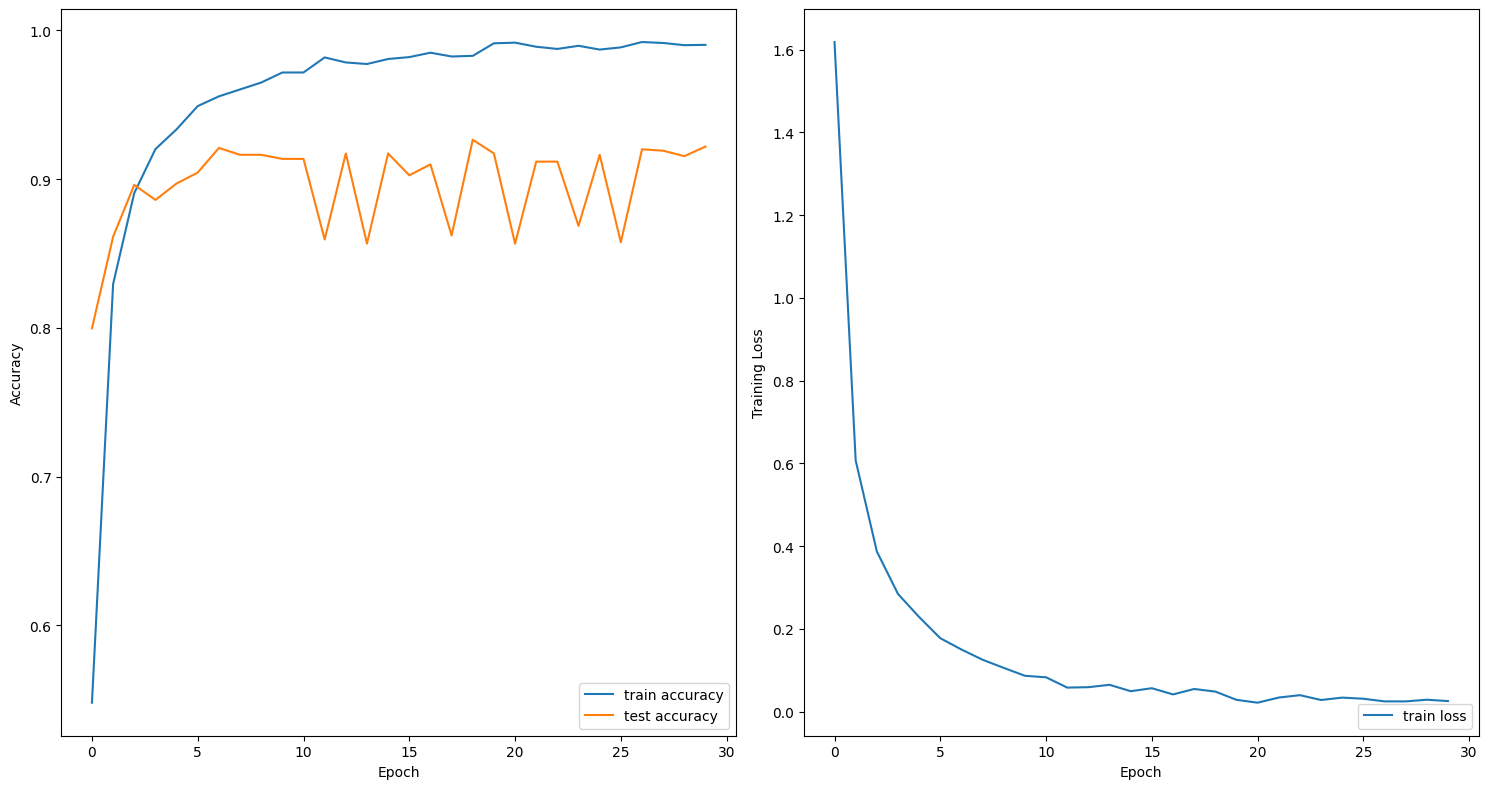

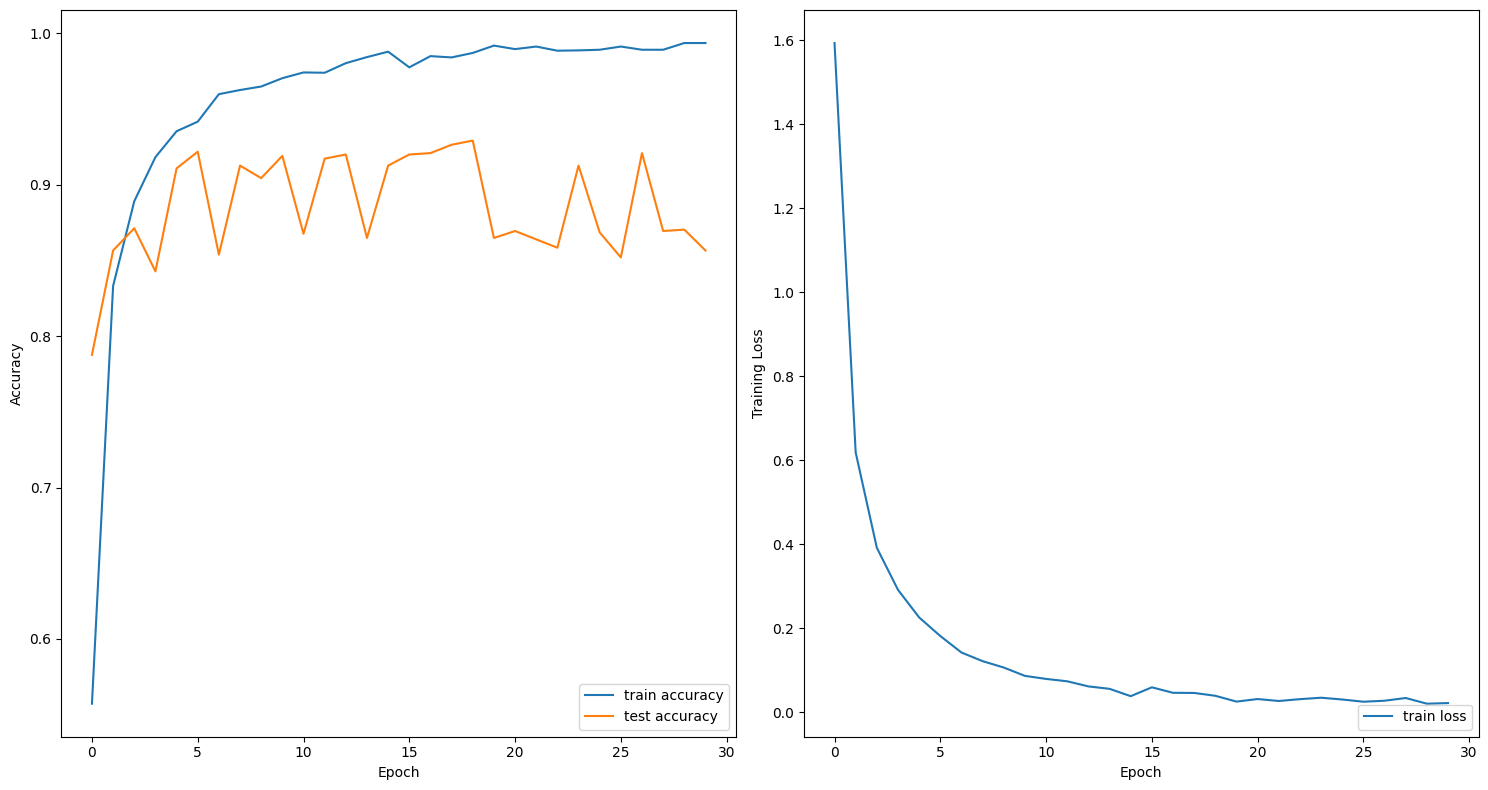

In [6]:
loss = nn.CrossEntropyLoss()

### SEPERATE ENSEMBLE CNN METHOD ###

# en
## without transformations
loader_train_en = DataLoader(db_train_en, batch_size=64, shuffle=True, drop_last=True)
loader_test_en = DataLoader(db_test_en, batch_size=64, shuffle=False)
model_en_no_trans = model_en_no_trans.to(device).float()
init_weights(model_en_no_trans)
hist_tr_loss_en, hist_tr_acc_en, hist_te_acc_en = fit(model_en_no_trans, loader_train_en, loader_test_en, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_en, label='train accuracy')
plt.plot(hist_te_acc_en, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_en, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_en_no_trans = eval(model_en_no_trans, loader_test_en)
print(f'Test accuracy: {acc_en_no_trans*100:.2f}%')

## with transformations
db_train_en.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_en = DataLoader(db_train_en, batch_size=64, shuffle=True, drop_last=True)
loader_test_en = DataLoader(db_test_en, batch_size=64, shuffle=False)
model_en = model_en.to(device).float()
init_weights(model_en)
hist_tr_loss_en, hist_tr_acc_en, hist_te_acc_en = fit(model_en, loader_train_en, loader_test_en, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_en, label='train accuracy')
plt.plot(hist_te_acc_en, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_en, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_en = eval(model_en, loader_test_en)
print(f'Test accuracy: {acc_en*100:.2f}%')

100%|██████████| 21/21 [00:00<00:00, 222.50it/s]


Finished epoch 0 of 30: Train Loss = 3.861   Train Acc = 0.295   Test Acc = 0.442


100%|██████████| 21/21 [00:00<00:00, 246.54it/s]

Finished epoch 1 of 30: Train Loss = 1.643   Train Acc = 0.505   Test Acc = 0.514



100%|██████████| 21/21 [00:00<00:00, 246.26it/s]

Finished epoch 2 of 30: Train Loss = 1.337   Train Acc = 0.582   Test Acc = 0.537



100%|██████████| 21/21 [00:00<00:00, 245.26it/s]

Finished epoch 3 of 30: Train Loss = 1.145   Train Acc = 0.641   Test Acc = 0.568



100%|██████████| 21/21 [00:00<00:00, 241.53it/s]

Finished epoch 4 of 30: Train Loss = 0.990   Train Acc = 0.680   Test Acc = 0.585



100%|██████████| 21/21 [00:00<00:00, 248.33it/s]

Finished epoch 5 of 30: Train Loss = 0.863   Train Acc = 0.714   Test Acc = 0.599



100%|██████████| 21/21 [00:00<00:00, 211.64it/s]

Finished epoch 6 of 30: Train Loss = 0.788   Train Acc = 0.738   Test Acc = 0.636



100%|██████████| 21/21 [00:00<00:00, 213.69it/s]

Finished epoch 7 of 30: Train Loss = 0.710   Train Acc = 0.762   Test Acc = 0.635



100%|██████████| 21/21 [00:00<00:00, 201.31it/s]

Finished epoch 8 of 30: Train Loss = 0.626   Train Acc = 0.793   Test Acc = 0.633



100%|██████████| 21/21 [00:00<00:00, 178.01it/s]

Finished epoch 9 of 30: Train Loss = 0.557   Train Acc = 0.810   Test Acc = 0.641



100%|██████████| 21/21 [00:00<00:00, 191.79it/s]

Finished epoch 10 of 30: Train Loss = 0.517   Train Acc = 0.823   Test Acc = 0.668



100%|██████████| 21/21 [00:00<00:00, 179.70it/s]

Finished epoch 11 of 30: Train Loss = 0.455   Train Acc = 0.850   Test Acc = 0.661



100%|██████████| 21/21 [00:00<00:00, 234.08it/s]

Finished epoch 12 of 30: Train Loss = 0.444   Train Acc = 0.846   Test Acc = 0.672



100%|██████████| 21/21 [00:00<00:00, 241.07it/s]

Finished epoch 13 of 30: Train Loss = 0.376   Train Acc = 0.870   Test Acc = 0.678



100%|██████████| 21/21 [00:00<00:00, 242.34it/s]

Finished epoch 14 of 30: Train Loss = 0.361   Train Acc = 0.877   Test Acc = 0.675



100%|██████████| 21/21 [00:00<00:00, 237.47it/s]

Finished epoch 15 of 30: Train Loss = 0.337   Train Acc = 0.880   Test Acc = 0.697



100%|██████████| 21/21 [00:00<00:00, 243.26it/s]

Finished epoch 16 of 30: Train Loss = 0.311   Train Acc = 0.896   Test Acc = 0.697



100%|██████████| 21/21 [00:00<00:00, 245.25it/s]

Finished epoch 17 of 30: Train Loss = 0.256   Train Acc = 0.912   Test Acc = 0.694



100%|██████████| 21/21 [00:00<00:00, 237.88it/s]

Finished epoch 18 of 30: Train Loss = 0.230   Train Acc = 0.921   Test Acc = 0.683



100%|██████████| 21/21 [00:00<00:00, 255.78it/s]

Finished epoch 19 of 30: Train Loss = 0.236   Train Acc = 0.917   Test Acc = 0.698



100%|██████████| 21/21 [00:00<00:00, 234.85it/s]

Finished epoch 20 of 30: Train Loss = 0.220   Train Acc = 0.926   Test Acc = 0.713



100%|██████████| 21/21 [00:00<00:00, 242.82it/s]

Finished epoch 21 of 30: Train Loss = 0.207   Train Acc = 0.929   Test Acc = 0.698



100%|██████████| 21/21 [00:00<00:00, 194.36it/s]

Finished epoch 22 of 30: Train Loss = 0.197   Train Acc = 0.933   Test Acc = 0.700



100%|██████████| 21/21 [00:00<00:00, 208.92it/s]

Finished epoch 23 of 30: Train Loss = 0.184   Train Acc = 0.940   Test Acc = 0.700



100%|██████████| 21/21 [00:00<00:00, 196.09it/s]

Finished epoch 24 of 30: Train Loss = 0.185   Train Acc = 0.936   Test Acc = 0.705



100%|██████████| 21/21 [00:00<00:00, 198.24it/s]


Finished epoch 25 of 30: Train Loss = 0.177   Train Acc = 0.943   Test Acc = 0.685


100%|██████████| 21/21 [00:00<00:00, 188.22it/s]

Finished epoch 26 of 30: Train Loss = 0.167   Train Acc = 0.943   Test Acc = 0.700



100%|██████████| 21/21 [00:00<00:00, 213.18it/s]

Finished epoch 27 of 30: Train Loss = 0.168   Train Acc = 0.939   Test Acc = 0.684



100%|██████████| 21/21 [00:00<00:00, 242.30it/s]

Finished epoch 28 of 30: Train Loss = 0.163   Train Acc = 0.948   Test Acc = 0.679



100%|██████████| 21/21 [00:00<00:00, 245.78it/s]

Finished epoch 29 of 30: Train Loss = 0.148   Train Acc = 0.950   Test Acc = 0.695



100%|██████████| 21/21 [00:00<00:00, 235.39it/s]


Test accuracy: 70.71%


100%|██████████| 21/21 [00:00<00:00, 237.33it/s]

Finished epoch 0 of 30: Train Loss = 3.058   Train Acc = 0.331   Test Acc = 0.478



100%|██████████| 21/21 [00:00<00:00, 246.08it/s]

Finished epoch 1 of 30: Train Loss = 1.355   Train Acc = 0.589   Test Acc = 0.571



100%|██████████| 21/21 [00:00<00:00, 239.18it/s]

Finished epoch 2 of 30: Train Loss = 0.979   Train Acc = 0.683   Test Acc = 0.627



100%|██████████| 21/21 [00:00<00:00, 237.74it/s]


Finished epoch 3 of 30: Train Loss = 0.744   Train Acc = 0.757   Test Acc = 0.643


100%|██████████| 21/21 [00:00<00:00, 243.46it/s]

Finished epoch 4 of 30: Train Loss = 0.607   Train Acc = 0.801   Test Acc = 0.649



100%|██████████| 21/21 [00:00<00:00, 244.09it/s]

Finished epoch 5 of 30: Train Loss = 0.496   Train Acc = 0.837   Test Acc = 0.674



100%|██████████| 21/21 [00:00<00:00, 241.53it/s]

Finished epoch 6 of 30: Train Loss = 0.446   Train Acc = 0.848   Test Acc = 0.664



100%|██████████| 21/21 [00:00<00:00, 248.30it/s]

Finished epoch 7 of 30: Train Loss = 0.369   Train Acc = 0.872   Test Acc = 0.695



100%|██████████| 21/21 [00:00<00:00, 202.39it/s]

Finished epoch 8 of 30: Train Loss = 0.327   Train Acc = 0.888   Test Acc = 0.682



100%|██████████| 21/21 [00:00<00:00, 189.49it/s]

Finished epoch 9 of 30: Train Loss = 0.292   Train Acc = 0.901   Test Acc = 0.687



100%|██████████| 21/21 [00:00<00:00, 172.90it/s]

Finished epoch 10 of 30: Train Loss = 0.252   Train Acc = 0.912   Test Acc = 0.675



100%|██████████| 21/21 [00:00<00:00, 208.97it/s]

Finished epoch 11 of 30: Train Loss = 0.254   Train Acc = 0.921   Test Acc = 0.673



100%|██████████| 21/21 [00:00<00:00, 190.91it/s]

Finished epoch 12 of 30: Train Loss = 0.229   Train Acc = 0.917   Test Acc = 0.684



100%|██████████| 21/21 [00:00<00:00, 209.19it/s]

Finished epoch 13 of 30: Train Loss = 0.214   Train Acc = 0.928   Test Acc = 0.699



100%|██████████| 21/21 [00:00<00:00, 243.28it/s]

Finished epoch 14 of 30: Train Loss = 0.183   Train Acc = 0.937   Test Acc = 0.694



100%|██████████| 21/21 [00:00<00:00, 239.96it/s]

Finished epoch 15 of 30: Train Loss = 0.186   Train Acc = 0.935   Test Acc = 0.704



100%|██████████| 21/21 [00:00<00:00, 233.28it/s]


Finished epoch 16 of 30: Train Loss = 0.171   Train Acc = 0.944   Test Acc = 0.692


100%|██████████| 21/21 [00:00<00:00, 238.22it/s]

Finished epoch 17 of 30: Train Loss = 0.156   Train Acc = 0.949   Test Acc = 0.707



100%|██████████| 21/21 [00:00<00:00, 242.82it/s]

Finished epoch 18 of 30: Train Loss = 0.165   Train Acc = 0.945   Test Acc = 0.704



100%|██████████| 21/21 [00:00<00:00, 243.59it/s]

Finished epoch 19 of 30: Train Loss = 0.143   Train Acc = 0.952   Test Acc = 0.727



100%|██████████| 21/21 [00:00<00:00, 244.74it/s]

Finished epoch 20 of 30: Train Loss = 0.144   Train Acc = 0.948   Test Acc = 0.722



100%|██████████| 21/21 [00:00<00:00, 245.88it/s]

Finished epoch 21 of 30: Train Loss = 0.142   Train Acc = 0.953   Test Acc = 0.710



100%|██████████| 21/21 [00:00<00:00, 233.80it/s]


Finished epoch 22 of 30: Train Loss = 0.117   Train Acc = 0.961   Test Acc = 0.711


100%|██████████| 21/21 [00:00<00:00, 247.82it/s]

Finished epoch 23 of 30: Train Loss = 0.112   Train Acc = 0.960   Test Acc = 0.701



100%|██████████| 21/21 [00:00<00:00, 247.43it/s]

Finished epoch 24 of 30: Train Loss = 0.126   Train Acc = 0.956   Test Acc = 0.705



100%|██████████| 21/21 [00:00<00:00, 209.96it/s]

Finished epoch 25 of 30: Train Loss = 0.114   Train Acc = 0.962   Test Acc = 0.693



100%|██████████| 21/21 [00:00<00:00, 211.31it/s]

Finished epoch 26 of 30: Train Loss = 0.119   Train Acc = 0.958   Test Acc = 0.699



100%|██████████| 21/21 [00:00<00:00, 211.14it/s]

Finished epoch 27 of 30: Train Loss = 0.118   Train Acc = 0.961   Test Acc = 0.705



100%|██████████| 21/21 [00:00<00:00, 209.10it/s]

Finished epoch 28 of 30: Train Loss = 0.113   Train Acc = 0.962   Test Acc = 0.705



100%|██████████| 21/21 [00:00<00:00, 193.69it/s]

Finished epoch 29 of 30: Train Loss = 0.108   Train Acc = 0.964   Test Acc = 0.697



100%|██████████| 21/21 [00:00<00:00, 211.34it/s]


Test accuracy: 68.98%


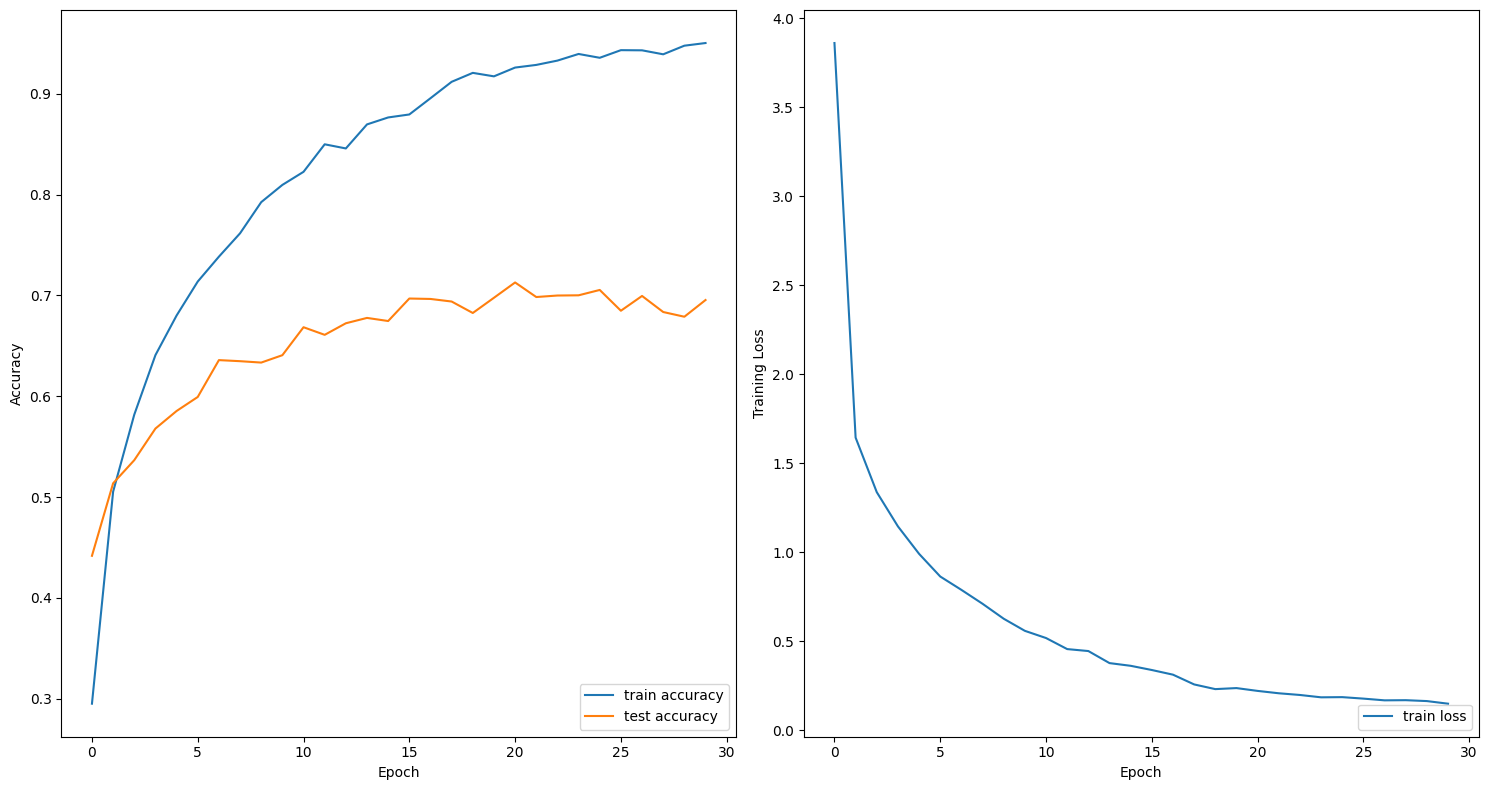

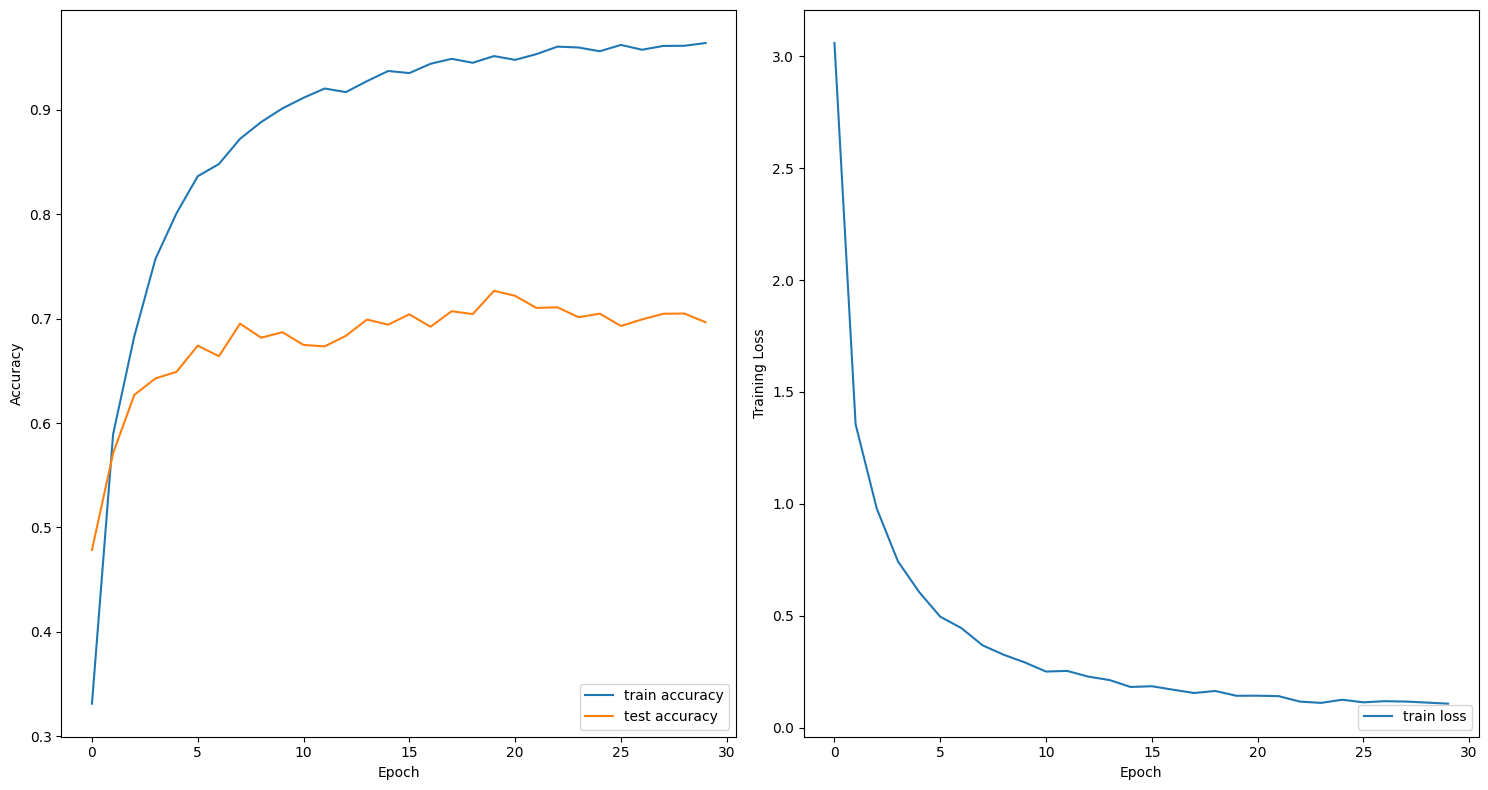

In [7]:
# ar
## without transformations
loader_train_ar = DataLoader(db_train_ar, batch_size=64, shuffle=True, drop_last=True)
loader_test_ar = DataLoader(db_test_ar, batch_size=64, shuffle=False)
model_ar_no_trans = model_ar_no_trans.to(device).float()
init_weights(model_ar_no_trans)
hist_tr_loss_ar, hist_tr_acc_ar, hist_te_acc_ar = fit(model_ar_no_trans, loader_train_ar, loader_test_ar, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_ar, label='train accuracy')
plt.plot(hist_te_acc_ar, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_ar, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_ar_no_trans = eval(model_ar_no_trans, loader_test_ar)
print(f'Test accuracy: {acc_ar_no_trans*100:.2f}%')

## with transformations
db_train_ar.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_ar = DataLoader(db_train_ar, batch_size=64, shuffle=True, drop_last=True)
loader_test_ar = DataLoader(db_test_ar, batch_size=64, shuffle=False)
model_ar = model_ar.to(device).float()
init_weights(model_ar)
hist_tr_loss_ar, hist_tr_acc_ar, hist_te_acc_ar = fit(model_ar, loader_train_ar, loader_test_ar, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_ar, label='train accuracy')
plt.plot(hist_te_acc_ar, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_ar, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_ar = eval(model_ar, loader_test_ar)
print(f'Test accuracy: {acc_ar*100:.2f}%')

100%|██████████| 34/34 [00:00<00:00, 224.99it/s]

Finished epoch 0 of 30: Train Loss = 3.392   Train Acc = 0.073   Test Acc = 0.133



100%|██████████| 34/34 [00:00<00:00, 228.13it/s]

Finished epoch 1 of 30: Train Loss = 2.563   Train Acc = 0.301   Test Acc = 0.391



100%|██████████| 34/34 [00:00<00:00, 227.07it/s]

Finished epoch 2 of 30: Train Loss = 1.973   Train Acc = 0.463   Test Acc = 0.484



100%|██████████| 34/34 [00:00<00:00, 223.07it/s]

Finished epoch 3 of 30: Train Loss = 1.628   Train Acc = 0.562   Test Acc = 0.557



100%|██████████| 34/34 [00:00<00:00, 225.33it/s]

Finished epoch 4 of 30: Train Loss = 1.411   Train Acc = 0.615   Test Acc = 0.582



100%|██████████| 34/34 [00:00<00:00, 204.25it/s]

Finished epoch 5 of 30: Train Loss = 1.260   Train Acc = 0.654   Test Acc = 0.627



100%|██████████| 34/34 [00:00<00:00, 201.48it/s]

Finished epoch 6 of 30: Train Loss = 1.138   Train Acc = 0.692   Test Acc = 0.634



100%|██████████| 34/34 [00:00<00:00, 191.87it/s]

Finished epoch 7 of 30: Train Loss = 1.056   Train Acc = 0.709   Test Acc = 0.653



100%|██████████| 34/34 [00:00<00:00, 200.21it/s]

Finished epoch 8 of 30: Train Loss = 0.985   Train Acc = 0.725   Test Acc = 0.669



100%|██████████| 34/34 [00:00<00:00, 226.16it/s]

Finished epoch 9 of 30: Train Loss = 0.936   Train Acc = 0.737   Test Acc = 0.671



100%|██████████| 34/34 [00:00<00:00, 217.02it/s]

Finished epoch 10 of 30: Train Loss = 0.853   Train Acc = 0.759   Test Acc = 0.673



100%|██████████| 34/34 [00:00<00:00, 228.47it/s]

Finished epoch 11 of 30: Train Loss = 0.826   Train Acc = 0.762   Test Acc = 0.681



100%|██████████| 34/34 [00:00<00:00, 234.10it/s]

Finished epoch 12 of 30: Train Loss = 0.758   Train Acc = 0.786   Test Acc = 0.691



100%|██████████| 34/34 [00:00<00:00, 224.29it/s]

Finished epoch 13 of 30: Train Loss = 0.710   Train Acc = 0.796   Test Acc = 0.708



100%|██████████| 34/34 [00:00<00:00, 224.39it/s]

Finished epoch 14 of 30: Train Loss = 0.668   Train Acc = 0.809   Test Acc = 0.711



100%|██████████| 34/34 [00:00<00:00, 193.64it/s]

Finished epoch 15 of 30: Train Loss = 0.645   Train Acc = 0.814   Test Acc = 0.702



100%|██████████| 34/34 [00:00<00:00, 198.87it/s]

Finished epoch 16 of 30: Train Loss = 0.599   Train Acc = 0.825   Test Acc = 0.719



100%|██████████| 34/34 [00:00<00:00, 189.22it/s]

Finished epoch 17 of 30: Train Loss = 0.570   Train Acc = 0.828   Test Acc = 0.713



100%|██████████| 34/34 [00:00<00:00, 188.68it/s]

Finished epoch 18 of 30: Train Loss = 0.547   Train Acc = 0.839   Test Acc = 0.723



100%|██████████| 34/34 [00:00<00:00, 227.47it/s]

Finished epoch 19 of 30: Train Loss = 0.501   Train Acc = 0.853   Test Acc = 0.717



100%|██████████| 34/34 [00:00<00:00, 223.34it/s]

Finished epoch 20 of 30: Train Loss = 0.484   Train Acc = 0.858   Test Acc = 0.728



100%|██████████| 34/34 [00:00<00:00, 223.44it/s]

Finished epoch 21 of 30: Train Loss = 0.444   Train Acc = 0.869   Test Acc = 0.730



100%|██████████| 34/34 [00:00<00:00, 229.57it/s]

Finished epoch 22 of 30: Train Loss = 0.438   Train Acc = 0.866   Test Acc = 0.716



100%|██████████| 34/34 [00:00<00:00, 222.46it/s]

Finished epoch 23 of 30: Train Loss = 0.406   Train Acc = 0.876   Test Acc = 0.732



100%|██████████| 34/34 [00:00<00:00, 198.33it/s]

Finished epoch 24 of 30: Train Loss = 0.385   Train Acc = 0.886   Test Acc = 0.723



100%|██████████| 34/34 [00:00<00:00, 185.79it/s]

Finished epoch 25 of 30: Train Loss = 0.354   Train Acc = 0.890   Test Acc = 0.729



100%|██████████| 34/34 [00:00<00:00, 192.19it/s]

Finished epoch 26 of 30: Train Loss = 0.339   Train Acc = 0.894   Test Acc = 0.732



100%|██████████| 34/34 [00:00<00:00, 193.07it/s]

Finished epoch 27 of 30: Train Loss = 0.334   Train Acc = 0.896   Test Acc = 0.728



100%|██████████| 34/34 [00:00<00:00, 219.41it/s]

Finished epoch 28 of 30: Train Loss = 0.313   Train Acc = 0.906   Test Acc = 0.745



100%|██████████| 34/34 [00:00<00:00, 221.36it/s]

Finished epoch 29 of 30: Train Loss = 0.303   Train Acc = 0.908   Test Acc = 0.742



100%|██████████| 34/34 [00:00<00:00, 219.12it/s]


Test accuracy: 73.59%


100%|██████████| 34/34 [00:00<00:00, 223.40it/s]

Finished epoch 0 of 30: Train Loss = 3.373   Train Acc = 0.078   Test Acc = 0.165



100%|██████████| 34/34 [00:00<00:00, 223.32it/s]

Finished epoch 1 of 30: Train Loss = 2.636   Train Acc = 0.269   Test Acc = 0.331



100%|██████████| 34/34 [00:00<00:00, 222.60it/s]

Finished epoch 2 of 30: Train Loss = 2.241   Train Acc = 0.381   Test Acc = 0.391



100%|██████████| 34/34 [00:00<00:00, 231.99it/s]

Finished epoch 3 of 30: Train Loss = 2.027   Train Acc = 0.447   Test Acc = 0.457



100%|██████████| 34/34 [00:00<00:00, 189.14it/s]

Finished epoch 4 of 30: Train Loss = 1.831   Train Acc = 0.505   Test Acc = 0.489



100%|██████████| 34/34 [00:00<00:00, 188.02it/s]

Finished epoch 5 of 30: Train Loss = 1.662   Train Acc = 0.544   Test Acc = 0.540



100%|██████████| 34/34 [00:00<00:00, 185.76it/s]

Finished epoch 6 of 30: Train Loss = 1.543   Train Acc = 0.579   Test Acc = 0.550



100%|██████████| 34/34 [00:00<00:00, 204.85it/s]

Finished epoch 7 of 30: Train Loss = 1.422   Train Acc = 0.609   Test Acc = 0.572



100%|██████████| 34/34 [00:00<00:00, 221.33it/s]

Finished epoch 8 of 30: Train Loss = 1.335   Train Acc = 0.636   Test Acc = 0.593



100%|██████████| 34/34 [00:00<00:00, 232.87it/s]

Finished epoch 9 of 30: Train Loss = 1.249   Train Acc = 0.655   Test Acc = 0.602



100%|██████████| 34/34 [00:00<00:00, 232.85it/s]

Finished epoch 10 of 30: Train Loss = 1.160   Train Acc = 0.677   Test Acc = 0.634



100%|██████████| 34/34 [00:00<00:00, 217.53it/s]

Finished epoch 11 of 30: Train Loss = 1.094   Train Acc = 0.693   Test Acc = 0.640



100%|██████████| 34/34 [00:00<00:00, 224.17it/s]

Finished epoch 12 of 30: Train Loss = 1.016   Train Acc = 0.715   Test Acc = 0.641



100%|██████████| 34/34 [00:00<00:00, 226.98it/s]

Finished epoch 13 of 30: Train Loss = 0.969   Train Acc = 0.728   Test Acc = 0.649



100%|██████████| 34/34 [00:00<00:00, 196.38it/s]

Finished epoch 14 of 30: Train Loss = 0.907   Train Acc = 0.743   Test Acc = 0.665



100%|██████████| 34/34 [00:00<00:00, 189.50it/s]

Finished epoch 15 of 30: Train Loss = 0.847   Train Acc = 0.762   Test Acc = 0.671



100%|██████████| 34/34 [00:00<00:00, 195.01it/s]

Finished epoch 16 of 30: Train Loss = 0.804   Train Acc = 0.771   Test Acc = 0.683



100%|██████████| 34/34 [00:00<00:00, 213.00it/s]

Finished epoch 17 of 30: Train Loss = 0.774   Train Acc = 0.785   Test Acc = 0.689



100%|██████████| 34/34 [00:00<00:00, 229.65it/s]

Finished epoch 18 of 30: Train Loss = 0.736   Train Acc = 0.789   Test Acc = 0.699



100%|██████████| 34/34 [00:00<00:00, 225.20it/s]

Finished epoch 19 of 30: Train Loss = 0.686   Train Acc = 0.803   Test Acc = 0.705



100%|██████████| 34/34 [00:00<00:00, 224.27it/s]

Finished epoch 20 of 30: Train Loss = 0.644   Train Acc = 0.813   Test Acc = 0.704



100%|██████████| 34/34 [00:00<00:00, 225.89it/s]

Finished epoch 21 of 30: Train Loss = 0.628   Train Acc = 0.818   Test Acc = 0.705



100%|██████████| 34/34 [00:00<00:00, 221.68it/s]

Finished epoch 22 of 30: Train Loss = 0.605   Train Acc = 0.827   Test Acc = 0.686



100%|██████████| 34/34 [00:00<00:00, 196.35it/s]

Finished epoch 23 of 30: Train Loss = 0.558   Train Acc = 0.839   Test Acc = 0.707



100%|██████████| 34/34 [00:00<00:00, 190.76it/s]

Finished epoch 24 of 30: Train Loss = 0.549   Train Acc = 0.838   Test Acc = 0.707



100%|██████████| 34/34 [00:00<00:00, 184.29it/s]

Finished epoch 25 of 30: Train Loss = 0.528   Train Acc = 0.838   Test Acc = 0.704



100%|██████████| 34/34 [00:00<00:00, 194.73it/s]

Finished epoch 26 of 30: Train Loss = 0.502   Train Acc = 0.848   Test Acc = 0.706



100%|██████████| 34/34 [00:00<00:00, 208.64it/s]

Finished epoch 27 of 30: Train Loss = 0.484   Train Acc = 0.855   Test Acc = 0.717



100%|██████████| 34/34 [00:00<00:00, 228.24it/s]

Finished epoch 28 of 30: Train Loss = 0.453   Train Acc = 0.862   Test Acc = 0.702



100%|██████████| 34/34 [00:00<00:00, 217.38it/s]

Finished epoch 29 of 30: Train Loss = 0.441   Train Acc = 0.867   Test Acc = 0.705



100%|██████████| 34/34 [00:00<00:00, 215.11it/s]


Test accuracy: 71.90%


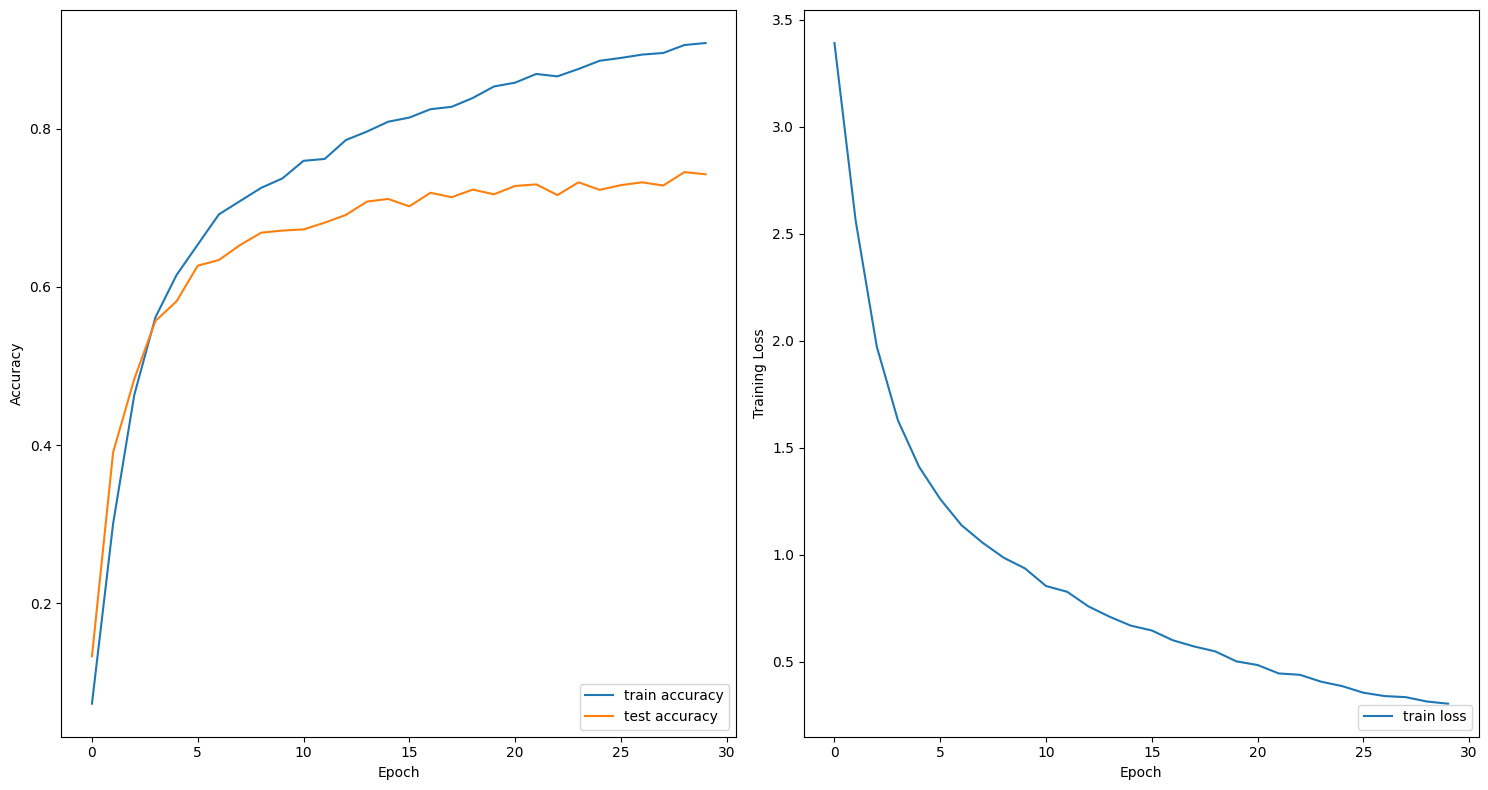

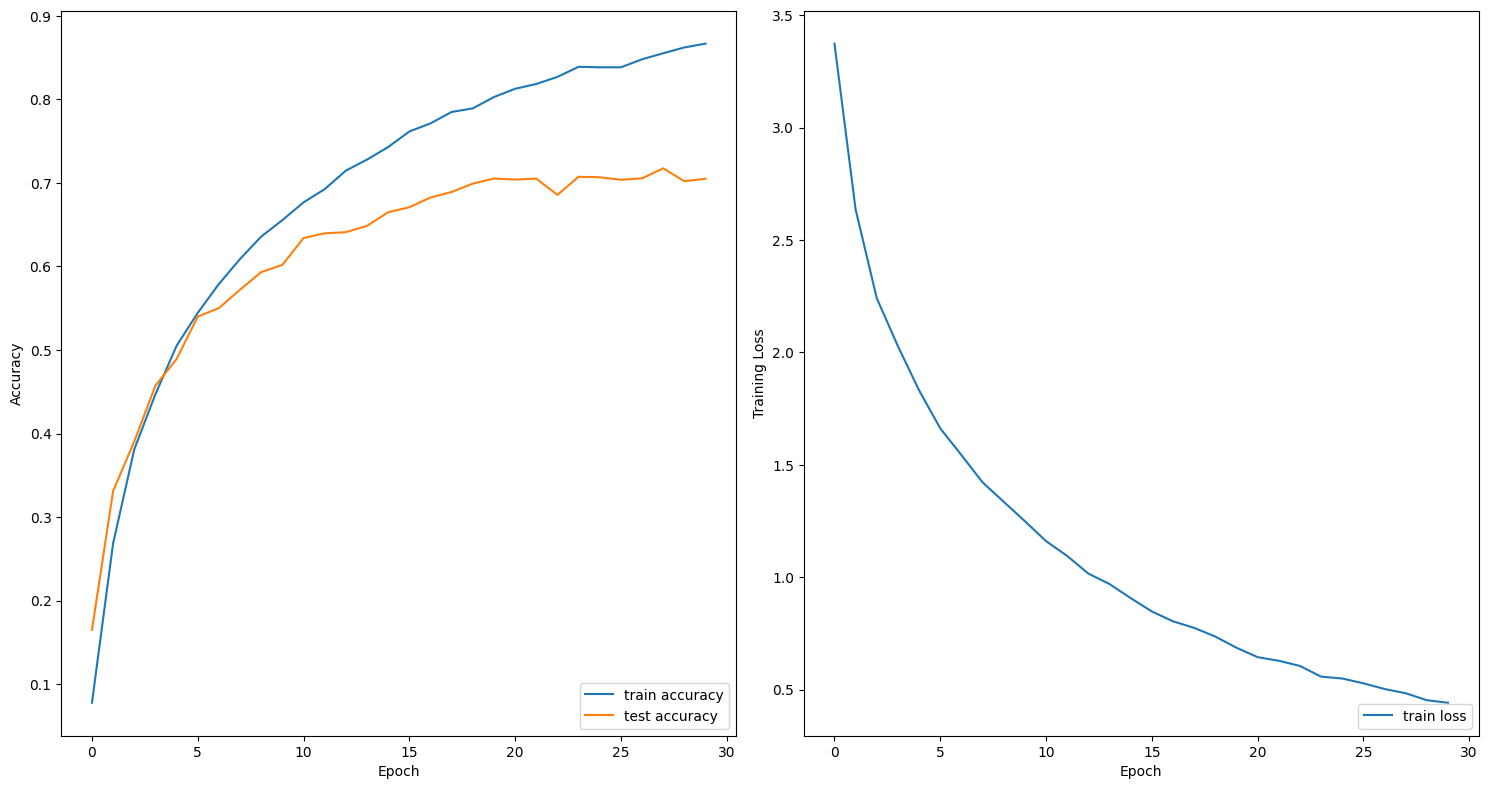

In [8]:
# rn
## without transformations
loader_train_rn = DataLoader(db_train_rn, batch_size=64, shuffle=True, drop_last=True)
loader_test_rn = DataLoader(db_test_rn, batch_size=64, shuffle=False)
model_rn_no_trans = model_rn_no_trans.to(device).float()
init_weights(model_rn_no_trans)
hist_tr_loss_rn, hist_tr_acc_rn, hist_te_acc_rn = fit(model_rn_no_trans, loader_train_rn, loader_test_rn, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_rn, label='train accuracy')
plt.plot(hist_te_acc_rn, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_rn, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_rn_no_trans = eval(model_rn_no_trans, loader_test_rn)
print(f'Test accuracy: {acc_rn_no_trans*100:.2f}%')

## with transformations
db_train_rn.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train_rn = DataLoader(db_train_rn, batch_size=64, shuffle=True, drop_last=True)
loader_test_rn = DataLoader(db_test_rn, batch_size=64, shuffle=False)
model_rn = model_rn.to(device).float()
init_weights(model_rn)
hist_tr_loss_rn, hist_tr_acc_rn, hist_te_acc_rn = fit(model_rn, loader_train_rn, loader_test_rn, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc_rn, label='train accuracy')
plt.plot(hist_te_acc_rn, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss_rn, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_rn = eval(model_rn, loader_test_rn)
print(f'Test accuracy: {acc_rn*100:.2f}%')

  0%|          | 0/325 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:00<00:00, 196.58it/s]

Finished epoch 0 of 30: Train Loss = 3.343   Train Acc = 0.182   Test Acc = 0.278



100%|██████████| 70/70 [00:00<00:00, 173.51it/s]


Finished epoch 1 of 30: Train Loss = 2.508   Train Acc = 0.314   Test Acc = 0.321


100%|██████████| 70/70 [00:00<00:00, 210.12it/s]

Finished epoch 2 of 30: Train Loss = 2.334   Train Acc = 0.349   Test Acc = 0.344



100%|██████████| 70/70 [00:00<00:00, 202.59it/s]

Finished epoch 3 of 30: Train Loss = 2.190   Train Acc = 0.382   Test Acc = 0.369



100%|██████████| 70/70 [00:00<00:00, 203.87it/s]

Finished epoch 4 of 30: Train Loss = 2.080   Train Acc = 0.412   Test Acc = 0.403



100%|██████████| 70/70 [00:00<00:00, 173.55it/s]

Finished epoch 5 of 30: Train Loss = 1.936   Train Acc = 0.453   Test Acc = 0.453



100%|██████████| 70/70 [00:00<00:00, 176.03it/s]

Finished epoch 6 of 30: Train Loss = 1.739   Train Acc = 0.506   Test Acc = 0.483



100%|██████████| 70/70 [00:00<00:00, 199.36it/s]

Finished epoch 7 of 30: Train Loss = 1.554   Train Acc = 0.561   Test Acc = 0.526



100%|██████████| 70/70 [00:00<00:00, 206.66it/s]

Finished epoch 8 of 30: Train Loss = 1.586   Train Acc = 0.567   Test Acc = 0.516



100%|██████████| 70/70 [00:00<00:00, 202.08it/s]

Finished epoch 9 of 30: Train Loss = 1.347   Train Acc = 0.618   Test Acc = 0.589



100%|██████████| 70/70 [00:00<00:00, 171.01it/s]

Finished epoch 10 of 30: Train Loss = 1.179   Train Acc = 0.667   Test Acc = 0.613



100%|██████████| 70/70 [00:00<00:00, 202.11it/s]

Finished epoch 11 of 30: Train Loss = 1.096   Train Acc = 0.689   Test Acc = 0.624



100%|██████████| 70/70 [00:00<00:00, 199.53it/s]

Finished epoch 12 of 30: Train Loss = 1.017   Train Acc = 0.713   Test Acc = 0.647



100%|██████████| 70/70 [00:00<00:00, 206.23it/s]

Finished epoch 13 of 30: Train Loss = 0.957   Train Acc = 0.730   Test Acc = 0.662



100%|██████████| 70/70 [00:00<00:00, 168.41it/s]

Finished epoch 14 of 30: Train Loss = 0.895   Train Acc = 0.752   Test Acc = 0.663



100%|██████████| 70/70 [00:00<00:00, 189.03it/s]

Finished epoch 15 of 30: Train Loss = 0.839   Train Acc = 0.760   Test Acc = 0.677



100%|██████████| 70/70 [00:00<00:00, 207.56it/s]

Finished epoch 16 of 30: Train Loss = 0.804   Train Acc = 0.772   Test Acc = 0.697



100%|██████████| 70/70 [00:00<00:00, 206.28it/s]

Finished epoch 17 of 30: Train Loss = 0.752   Train Acc = 0.789   Test Acc = 0.696



100%|██████████| 70/70 [00:00<00:00, 169.22it/s]

Finished epoch 18 of 30: Train Loss = 0.731   Train Acc = 0.791   Test Acc = 0.700



100%|██████████| 70/70 [00:00<00:00, 166.80it/s]

Finished epoch 19 of 30: Train Loss = 0.672   Train Acc = 0.809   Test Acc = 0.720



100%|██████████| 70/70 [00:00<00:00, 206.69it/s]

Finished epoch 20 of 30: Train Loss = 0.656   Train Acc = 0.810   Test Acc = 0.708



100%|██████████| 70/70 [00:00<00:00, 205.29it/s]

Finished epoch 21 of 30: Train Loss = 0.617   Train Acc = 0.826   Test Acc = 0.716



100%|██████████| 70/70 [00:00<00:00, 200.79it/s]

Finished epoch 22 of 30: Train Loss = 0.592   Train Acc = 0.829   Test Acc = 0.717



100%|██████████| 70/70 [00:00<00:00, 174.43it/s]

Finished epoch 23 of 30: Train Loss = 0.566   Train Acc = 0.835   Test Acc = 0.729



100%|██████████| 70/70 [00:00<00:00, 200.83it/s]

Finished epoch 24 of 30: Train Loss = 0.532   Train Acc = 0.847   Test Acc = 0.724



100%|██████████| 70/70 [00:00<00:00, 210.02it/s]

Finished epoch 25 of 30: Train Loss = 0.509   Train Acc = 0.852   Test Acc = 0.730



100%|██████████| 70/70 [00:00<00:00, 204.02it/s]

Finished epoch 26 of 30: Train Loss = 0.481   Train Acc = 0.860   Test Acc = 0.749



100%|██████████| 70/70 [00:00<00:00, 171.01it/s]

Finished epoch 27 of 30: Train Loss = 0.465   Train Acc = 0.867   Test Acc = 0.752



100%|██████████| 70/70 [00:00<00:00, 170.87it/s]

Finished epoch 28 of 30: Train Loss = 0.435   Train Acc = 0.875   Test Acc = 0.737



100%|██████████| 70/70 [00:00<00:00, 201.39it/s]

Finished epoch 29 of 30: Train Loss = 0.424   Train Acc = 0.877   Test Acc = 0.745



100%|██████████| 70/70 [00:00<00:00, 198.97it/s]


Test accuracy: 75.37%


100%|██████████| 70/70 [00:00<00:00, 199.28it/s]

Finished epoch 0 of 30: Train Loss = 3.206   Train Acc = 0.213   Test Acc = 0.319



100%|██████████| 70/70 [00:01<00:00, 67.74it/s]

Finished epoch 1 of 30: Train Loss = 2.320   Train Acc = 0.359   Test Acc = 0.376



100%|██████████| 70/70 [00:00<00:00, 98.98it/s] 

Finished epoch 2 of 30: Train Loss = 2.066   Train Acc = 0.427   Test Acc = 0.427



100%|██████████| 70/70 [00:00<00:00, 201.44it/s]

Finished epoch 3 of 30: Train Loss = 1.768   Train Acc = 0.500   Test Acc = 0.508



100%|██████████| 70/70 [00:00<00:00, 204.10it/s]

Finished epoch 4 of 30: Train Loss = 1.482   Train Acc = 0.577   Test Acc = 0.561



100%|██████████| 70/70 [00:00<00:00, 175.53it/s]

Finished epoch 5 of 30: Train Loss = 1.321   Train Acc = 0.630   Test Acc = 0.573



100%|██████████| 70/70 [00:00<00:00, 202.64it/s]

Finished epoch 6 of 30: Train Loss = 1.194   Train Acc = 0.662   Test Acc = 0.615



100%|██████████| 70/70 [00:00<00:00, 203.21it/s]

Finished epoch 7 of 30: Train Loss = 1.070   Train Acc = 0.697   Test Acc = 0.644



100%|██████████| 70/70 [00:00<00:00, 204.05it/s]

Finished epoch 8 of 30: Train Loss = 0.986   Train Acc = 0.722   Test Acc = 0.656



100%|██████████| 70/70 [00:00<00:00, 169.60it/s]

Finished epoch 9 of 30: Train Loss = 0.890   Train Acc = 0.749   Test Acc = 0.671



100%|██████████| 70/70 [00:00<00:00, 176.39it/s]

Finished epoch 10 of 30: Train Loss = 0.829   Train Acc = 0.765   Test Acc = 0.682



100%|██████████| 70/70 [00:00<00:00, 202.60it/s]

Finished epoch 11 of 30: Train Loss = 0.756   Train Acc = 0.785   Test Acc = 0.683



100%|██████████| 70/70 [00:00<00:00, 206.79it/s]

Finished epoch 12 of 30: Train Loss = 0.717   Train Acc = 0.792   Test Acc = 0.711



100%|██████████| 70/70 [00:00<00:00, 163.92it/s]

Finished epoch 13 of 30: Train Loss = 0.667   Train Acc = 0.812   Test Acc = 0.715



100%|██████████| 70/70 [00:00<00:00, 162.96it/s]

Finished epoch 14 of 30: Train Loss = 0.628   Train Acc = 0.820   Test Acc = 0.731



100%|██████████| 70/70 [00:00<00:00, 203.32it/s]

Finished epoch 15 of 30: Train Loss = 0.601   Train Acc = 0.827   Test Acc = 0.733



100%|██████████| 70/70 [00:00<00:00, 203.48it/s]

Finished epoch 16 of 30: Train Loss = 0.566   Train Acc = 0.836   Test Acc = 0.733



100%|██████████| 70/70 [00:00<00:00, 203.90it/s]

Finished epoch 17 of 30: Train Loss = 0.553   Train Acc = 0.841   Test Acc = 0.743



100%|██████████| 70/70 [00:00<00:00, 170.39it/s]

Finished epoch 18 of 30: Train Loss = 0.516   Train Acc = 0.851   Test Acc = 0.735



100%|██████████| 70/70 [00:00<00:00, 206.41it/s]

Finished epoch 19 of 30: Train Loss = 0.496   Train Acc = 0.855   Test Acc = 0.746



100%|██████████| 70/70 [00:00<00:00, 203.56it/s]

Finished epoch 20 of 30: Train Loss = 0.472   Train Acc = 0.864   Test Acc = 0.744



100%|██████████| 70/70 [00:00<00:00, 202.29it/s]

Finished epoch 21 of 30: Train Loss = 0.442   Train Acc = 0.870   Test Acc = 0.757



100%|██████████| 70/70 [00:01<00:00, 67.74it/s]

Finished epoch 22 of 30: Train Loss = 0.420   Train Acc = 0.878   Test Acc = 0.742



100%|██████████| 70/70 [00:00<00:00, 172.82it/s]

Finished epoch 23 of 30: Train Loss = 0.411   Train Acc = 0.879   Test Acc = 0.760



100%|██████████| 70/70 [00:00<00:00, 203.44it/s]

Finished epoch 24 of 30: Train Loss = 0.391   Train Acc = 0.885   Test Acc = 0.763



100%|██████████| 70/70 [00:00<00:00, 200.16it/s]

Finished epoch 25 of 30: Train Loss = 0.375   Train Acc = 0.888   Test Acc = 0.751



100%|██████████| 70/70 [00:00<00:00, 172.07it/s]

Finished epoch 26 of 30: Train Loss = 0.357   Train Acc = 0.895   Test Acc = 0.758



100%|██████████| 70/70 [00:00<00:00, 175.95it/s]

Finished epoch 27 of 30: Train Loss = 0.345   Train Acc = 0.895   Test Acc = 0.761



100%|██████████| 70/70 [00:00<00:00, 202.01it/s]

Finished epoch 28 of 30: Train Loss = 0.345   Train Acc = 0.898   Test Acc = 0.765



100%|██████████| 70/70 [00:00<00:00, 205.56it/s]

Finished epoch 29 of 30: Train Loss = 0.327   Train Acc = 0.902   Test Acc = 0.770



100%|██████████| 70/70 [00:00<00:00, 197.54it/s]


Test accuracy: 77.11%


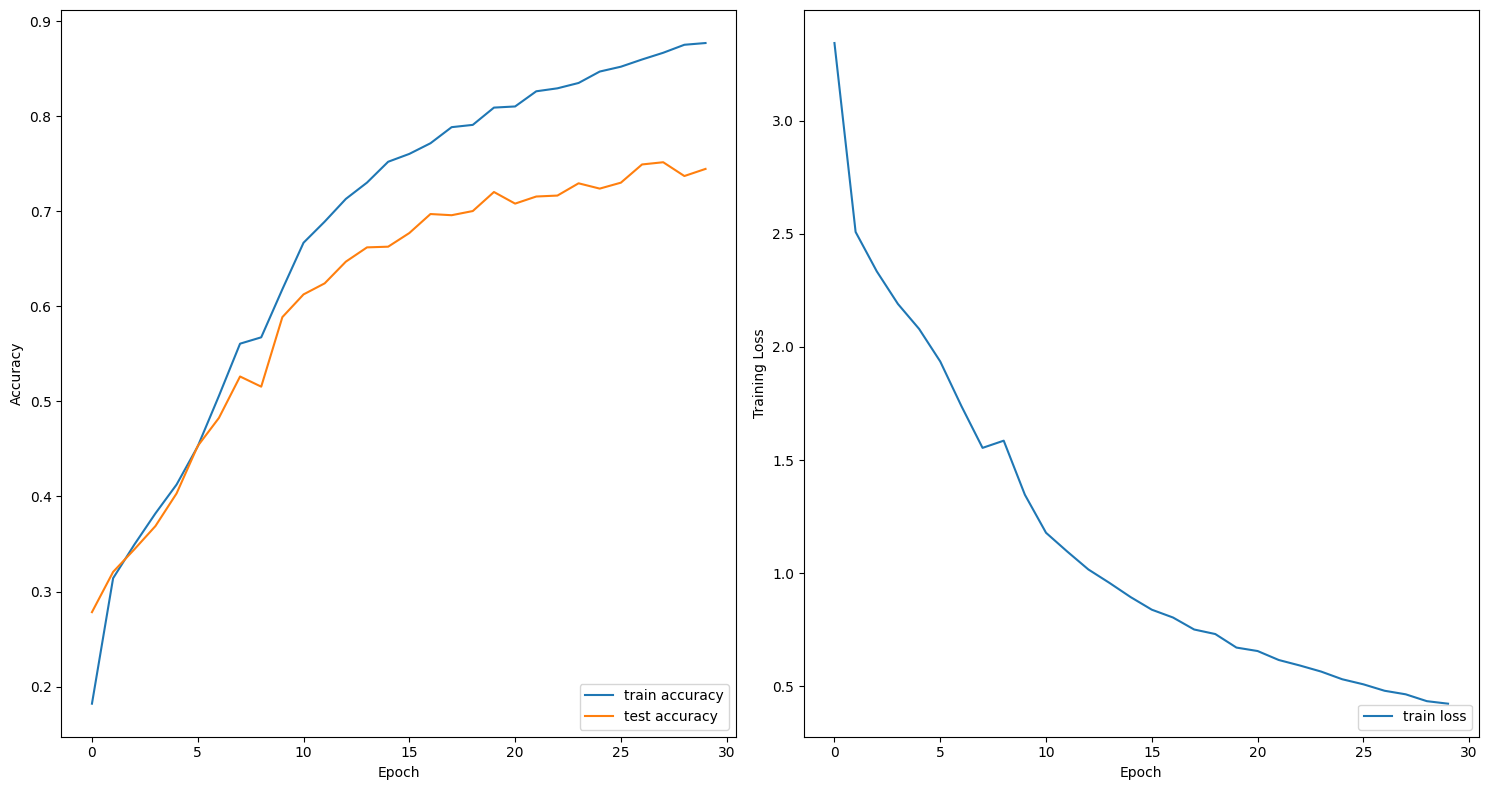

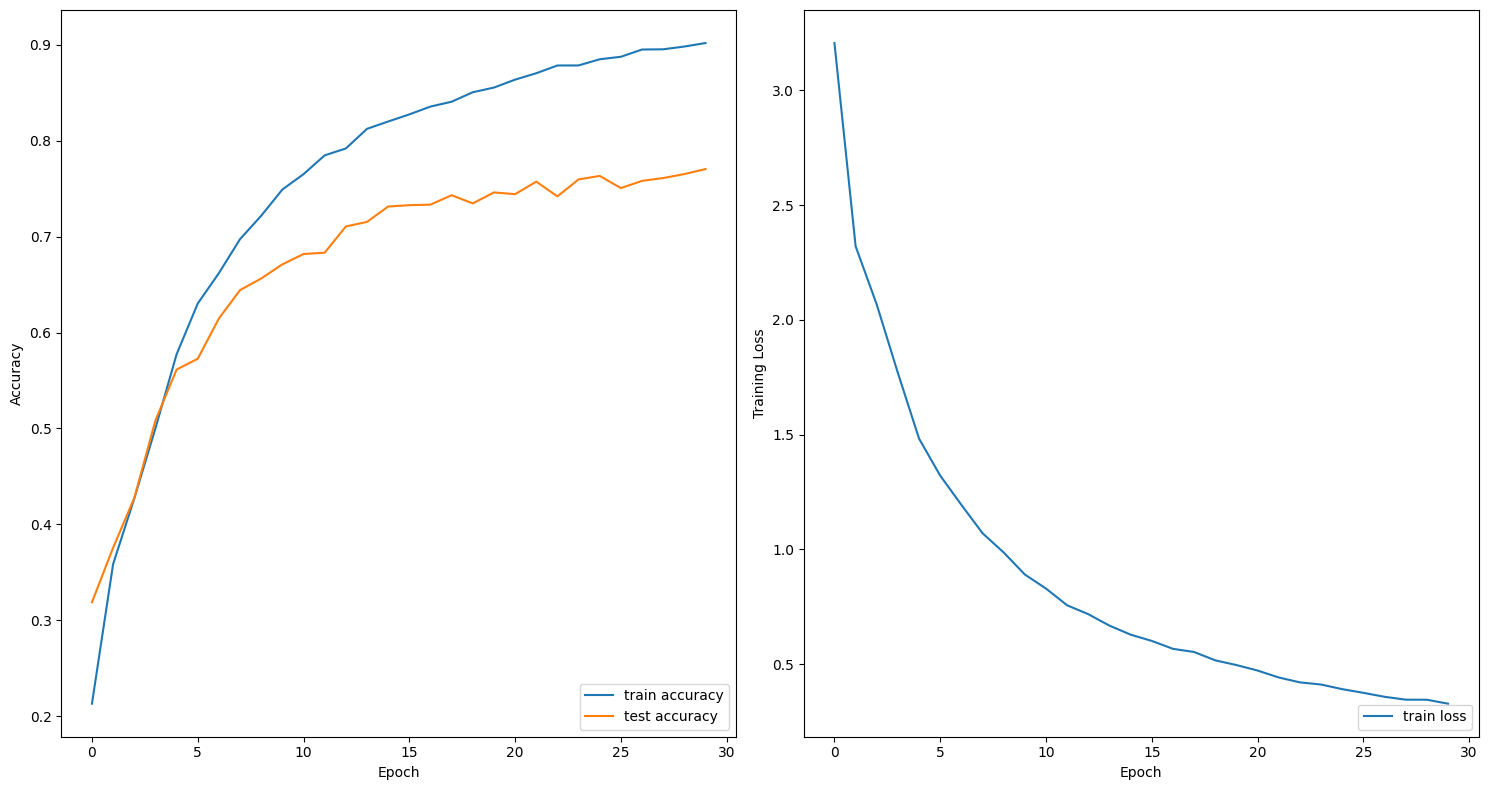

In [9]:
### COMBINED CNN METHOD ###

## without trans
loader_train = DataLoader(db_train, batch_size=64, shuffle=True, drop_last=True)
loader_test = DataLoader(db_test, batch_size=64, shuffle=False)
model_no_trans = model_no_trans.to(device).float()
init_weights(model_no_trans)
hist_tr_loss, hist_tr_acc, hist_te_acc = fit(model_no_trans, loader_train, loader_test, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc, label='train accuracy')
plt.plot(hist_te_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc_no_trans = eval(model_no_trans, loader_test)
print(f'Test accuracy: {acc_no_trans*100:.2f}%')

## with trans
db_train.transform = transforms.Compose([
    transforms.RandomAffine(degrees=90, translate=(0.2,0.2), scale=(1,1.2)),
    transforms.ToTensor()
])

loader_train = DataLoader(db_train, batch_size=64, shuffle=True, drop_last=True)
loader_test = DataLoader(db_test, batch_size=64, shuffle=False)
model = model.to(device).float()
init_weights(model)
hist_tr_loss, hist_tr_acc, hist_te_acc = fit(model, loader_train, loader_test, epochs=30)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(hist_tr_acc, label='train accuracy')
plt.plot(hist_te_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist_tr_loss, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.tight_layout()

acc = eval(model, loader_test)
print(f'Test accuracy: {acc*100:.2f}%')

In [10]:
@torch.no_grad()
def eval_seperate_together(model_en, model_ar, model_rn, loader):
    accuracies = []

    ###
    en_zeros = torch.tensor(np.array([0.] * (total_num_classes - en_num_classes))).to(device).float()

    ar_zeros_front = torch.tensor(np.array([0.] * en_num_classes)).to(device).float()
    ar_zeros_end = torch.tensor(np.array([0.] * (total_num_classes - en_num_classes - ar_num_classes))).to(device).float()

    rn_zeros = torch.tensor(np.array([0.] * (total_num_classes - rn_num_classes))).to(device).float()
    ###

    for images, labels in tqdm.tqdm(loader):
        # Prepare data
        images = images.to(device)
        labels = labels.to(device)

        # Compute predictions, loss and accuracy
        pred_en = model_en(images)
        pred_ar = model_ar(images)
        pred_rn = model_rn(images)

        preds = (model_en(images), model_ar(images), model_rn(images))

        en_soft = nn.Softmax(1)(preds[0])
        ar_soft = nn.Softmax(1)(preds[1])
        rn_soft = nn.Softmax(1)(preds[2])

        en_conf = torch.tensor([en_soft[i][en_soft[i].argmax(-1)] for i in range(en_soft.shape[0])])
        ar_conf = torch.tensor([ar_soft[i][ar_soft[i].argmax(-1)] for i in range(ar_soft.shape[0])])
        rn_conf = torch.tensor([rn_soft[i][rn_soft[i].argmax(-1)] for i in range(rn_soft.shape[0])])

        c = torch.stack((en_conf, ar_conf, rn_conf))
        c_max = c.argmax(0)

        for i in range(len(c_max)):
            if c_max[i] == 0: #en
                pred_in = torch.cat((preds[c_max[i]][i], en_zeros), dim=-1)[None]
            elif c_max[i] == 1: #ar
                pred_in = torch.cat((torch.cat((ar_zeros_front, preds[c_max[i]][i]), dim=-1), ar_zeros_end), dim=-1)[None]
            elif c_max[i] == 2: #rn
                pred_in = torch.cat((rn_zeros, preds[c_max[i]][i]), dim=-1)[None]

            if i == 0:
                pred = pred_in
            else:
                pred = torch.cat((pred, pred_in), dim=0)

        acc = accuracy(pred, labels)
        accuracies.append(acc.detach().item())
    return np.mean(accuracies)

acc = eval_seperate_together(model_en, model_ar, model_rn, loader_test)
print(f'Test accuracy: {acc*100:.2f}%')

  0%|          | 0/70 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:02<00:00, 32.71it/s]

Test accuracy: 45.61%


100%|██████████| 17/17 [00:00<00:00, 199.02it/s]


EN CNN Test accuracy: 85.57%


100%|██████████| 21/21 [00:00<00:00, 181.17it/s]


AR CNN Test accuracy: 70.76%


100%|██████████| 34/34 [00:00<00:00, 185.77it/s]


RN CNN Test accuracy: 71.76%


  0%|          | 0/70 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:00<00:00, 167.85it/s]


Combined CNN Test accuracy: 77.49%


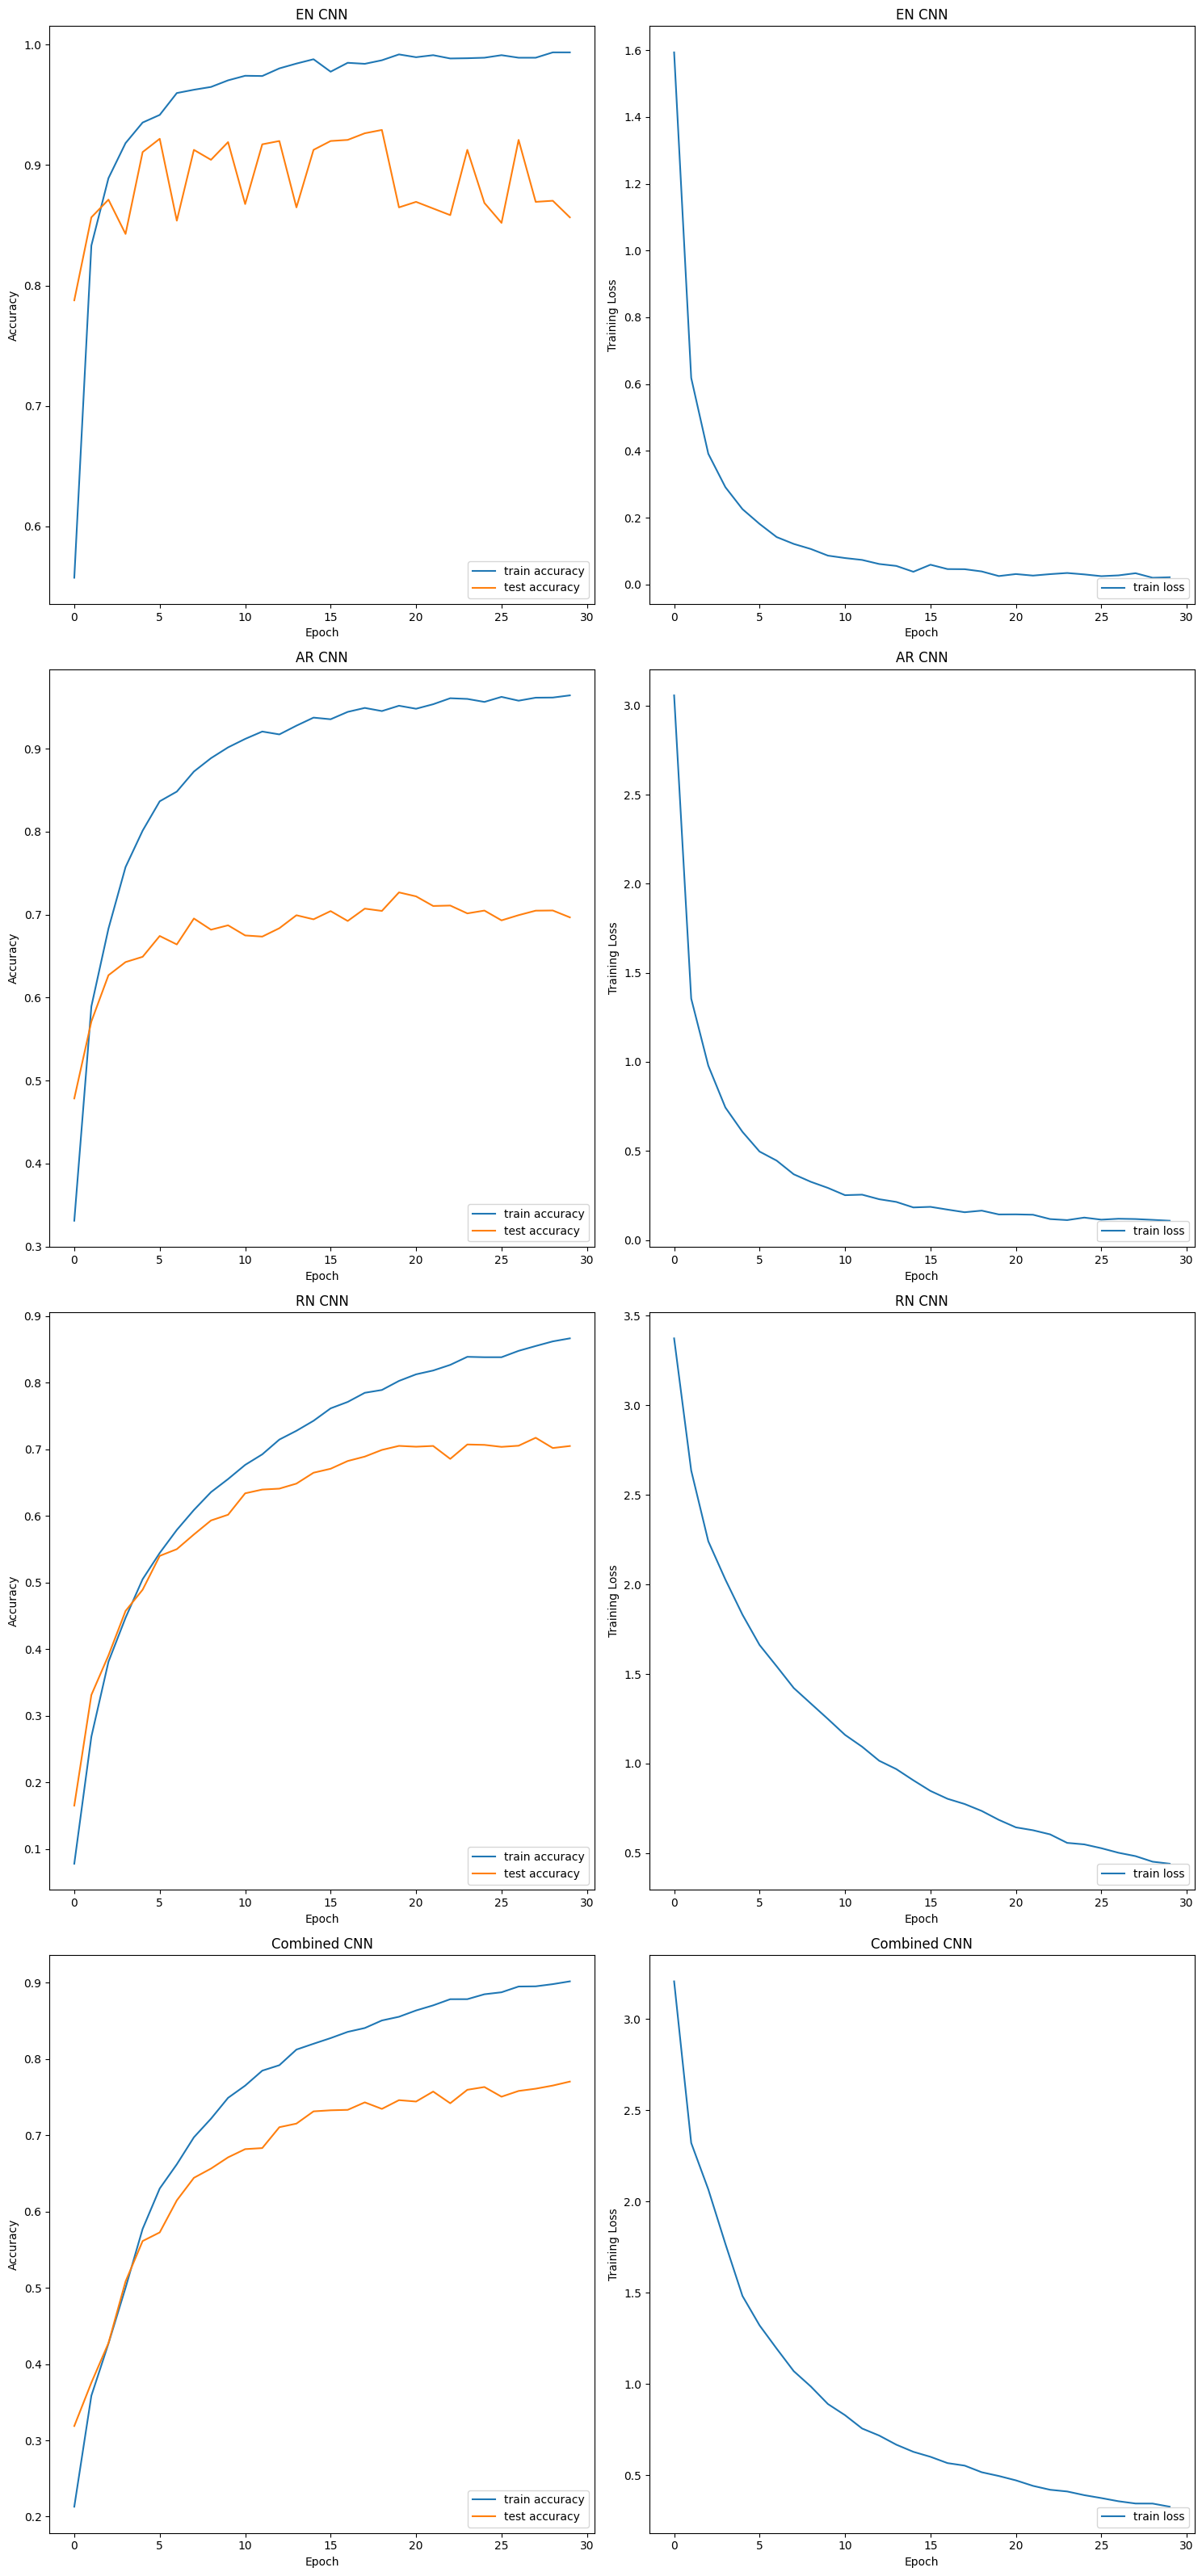

In [11]:
plt.figure(figsize=(15,32))

### SEPERATE ENSEMBLE CNN METHOD ###

# en
plt.subplot(4, 2, 1)
plt.plot(hist_tr_acc_en, label='train accuracy')
plt.plot(hist_te_acc_en, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('EN CNN')

plt.subplot(4, 2, 2)
plt.plot(hist_tr_loss_en, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('EN CNN')

# ar
plt.subplot(4, 2, 3)
plt.plot(hist_tr_acc_ar, label='train accuracy')
plt.plot(hist_te_acc_ar, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('AR CNN')

plt.subplot(4, 2, 4)
plt.plot(hist_tr_loss_ar, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('AR CNN')

# rn
plt.subplot(4, 2, 5)
plt.plot(hist_tr_acc_rn, label='train accuracy')
plt.plot(hist_te_acc_rn, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('RN CNN')

plt.subplot(4, 2, 6)
plt.plot(hist_tr_loss_rn, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('RN CNN')

### COMBINED CNN METHOD ###

plt.subplot(4, 2, 7)
plt.plot(hist_tr_acc, label='train accuracy')
plt.plot(hist_te_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Combined CNN')

plt.subplot(4, 2, 8)
plt.plot(hist_tr_loss, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='lower right')
plt.title('Combined CNN')


plt.tight_layout()

# accuracy

# en
acc = eval(model_en, loader_test_en)
print(f'EN CNN Test accuracy: {acc*100:.2f}%')

# ar
acc = eval(model_ar, loader_test_ar)
print(f'AR CNN Test accuracy: {acc*100:.2f}%')

# rn
acc = eval(model_rn, loader_test_rn)
print(f'RN CNN Test accuracy: {acc*100:.2f}%')

# combined
acc = eval(model, loader_test)
print(f'Combined CNN Test accuracy: {acc*100:.2f}%')

In [12]:
acc_conf = eval_seperate_together(model_en, model_ar, model_rn, loader_test)
acc = eval(model, loader_test)

print(f"""
Accuracies:

EN CNN: {acc_en*100:.2f}%
EN CNN no transformations: {acc_en_no_trans*100:.2f}%

AR CNN: {acc_ar*100:.2f}%
AR CNN no transformations: {acc_ar_no_trans*100:.2f}%

RN CNN: {acc_rn*100:.2f}%
RN CNN no transformations: {acc_rn_no_trans*100:.2f}%

Combined CNN: {acc*100:.2f}%
Combined CNN no transformations: {acc_no_trans*100:.2f}%

Confidence CNN: {acc_conf*100:.2f}%
""")

  0%|          | 0/70 [00:00<?, ?it/s]<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long
100%|██████████| 70/70 [00:00<00:00, 192.66it/s]


Accuracies:

EN CNN: 85.39%
EN CNN no transformations: 92.28%

AR CNN: 68.98%
AR CNN no transformations: 70.71%

RN CNN: 71.90%
RN CNN no transformations: 73.59%

Combined CNN: 77.09%
Combined CNN no transformations: 75.37%

Confidence CNN: 46.20%



<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long


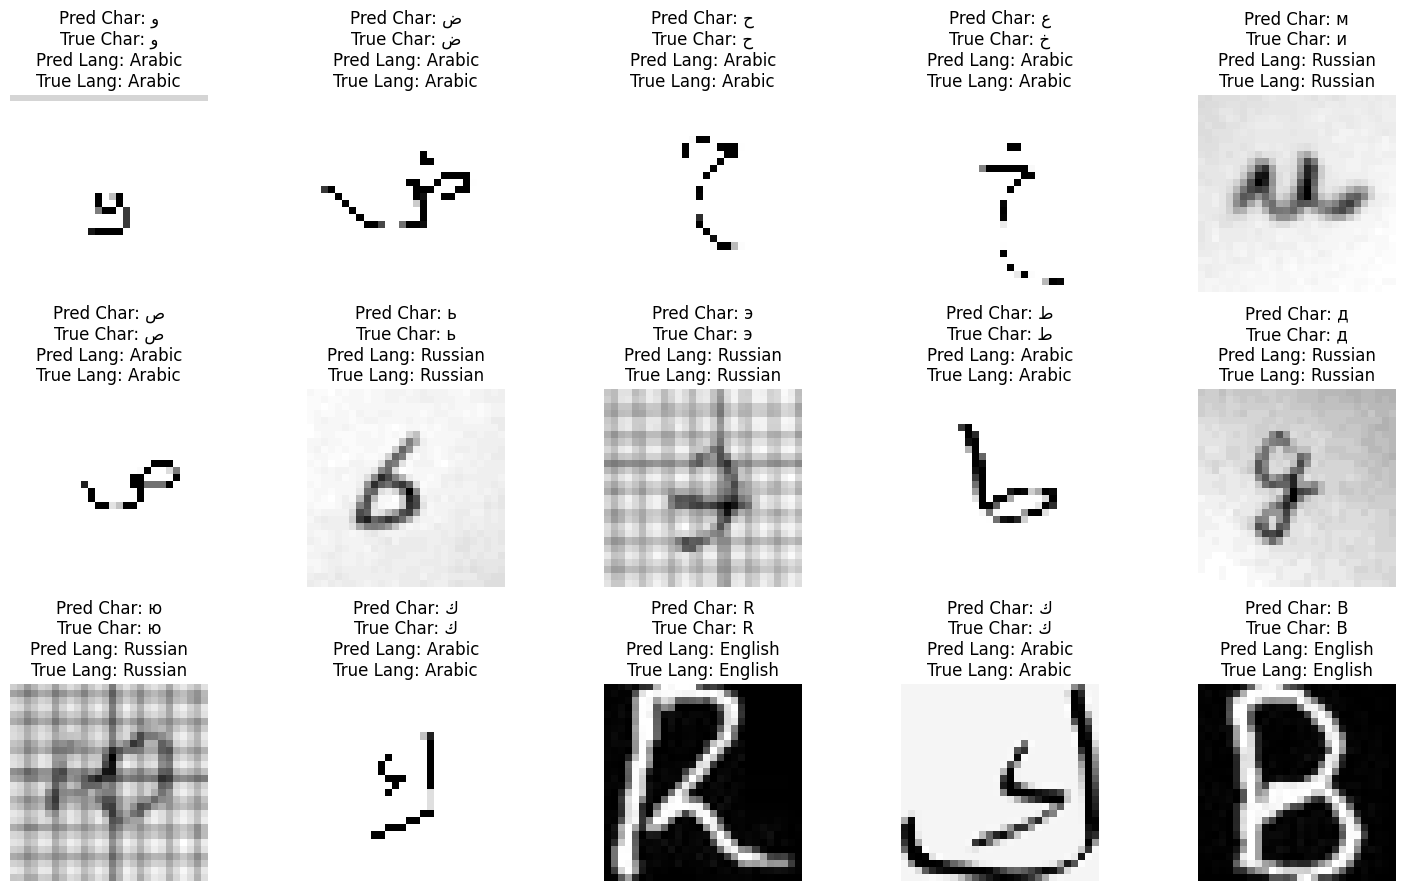

In [37]:
import matplotlib.pyplot as plt

# Function to show images, predictions, and true labels
def show_predictions(loader, model, classes, num_images=16, rows=4, cols=4):
    # Set model to evaluation mode
    model.eval()

    # Get a batch of images and labels from the loader
    images, labels = next(iter(loader))

    # Move images to the same device as the model
    images = images.to(device)

    # Make predictions
    preds = model(images)
    preds = torch.argmax(preds, dim=1)

    # Move images and labels back to CPU for visualization
    images = images.cpu()
    labels = labels.cpu()
    preds = preds.cpu()

    # Create a figure to display the images
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    for i in range(num_images):
        ax = axes[i // cols, i % cols]
        img = images[i].permute(1, 2, 0)  # Change (C, H, W) to (H, W, C) for displaying

        # Display the image
        ax.imshow(img.squeeze(), cmap='gray')  # Remove the channel dimension if it's 1

        if (labels[i] < 26):
          true_lang = 'English'
        elif (labels[i] < 54):
          true_lang = 'Arabic'
        else:
          true_lang = 'Russian'

        if (preds[i] < 26):
          pred_lang = 'English'
        elif (preds[i] < 54):
          pred_lang = 'Arabic'
        else:
          pred_lang = 'Russian'

        # Set the title of the subplot to the predicted and true labels
        ax.set_title(f'Pred Char: {classes[preds[i]]}\nTrue Char: {classes[labels[i]]}\nPred Lang: {pred_lang}\nTrue Lang: {true_lang}')

        # Hide the axes
        ax.axis('off')

    # Adjust subplot parameters for a clean layout
    plt.tight_layout()
    plt.show()

# Define the class names (assuming they are letters A-Z)
class_names_en = [chr(i) for i in range(65, 65 + en_num_classes)]

class_names_en = [chr(i) for i in range(65, 91)]  # A-Z
class_names_ru = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я']
class_names_ar = ['أ','ب','ت','ث','ج','ح','خ','د','ذ','ر','ز','س','ش','ص','ض','ط','ظ','ع','غ','ف','ق','ك','ل','م','ن','ه','و','ي']
# Combine all class names
class_names = class_names_en + class_names_ar + class_names_ru

# Call the function to show the predictions
show_predictions(loader_test, model, class_names, num_images=15, rows=3, cols=5)

In [28]:
# Set model to evaluation mode
model.eval()

# Initialize lists to store all labels and predictions
all_labels = []
all_preds = []

# Iterate over all batches in the test loader
for images, labels in loader_test:
    # Move images and labels to the same device as the model
    images = images.to(device)
    labels = labels.to(device)

    # Make predictions
    preds = model(images)
    preds = torch.argmax(preds, dim=1)

    # Store predictions and labels
    all_labels.append(labels.cpu())
    all_preds.append(preds.cpu())

# Concatenate all batches
all_labels = torch.cat(all_labels)
all_preds = torch.cat(all_preds)

<ipython-input-3-5cb571ecbd3c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.tensor(self.dataset[idx], dtype=torch.float)
<ipython-input-3-5cb571ecbd3c>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)  # Change dtype to torch.long


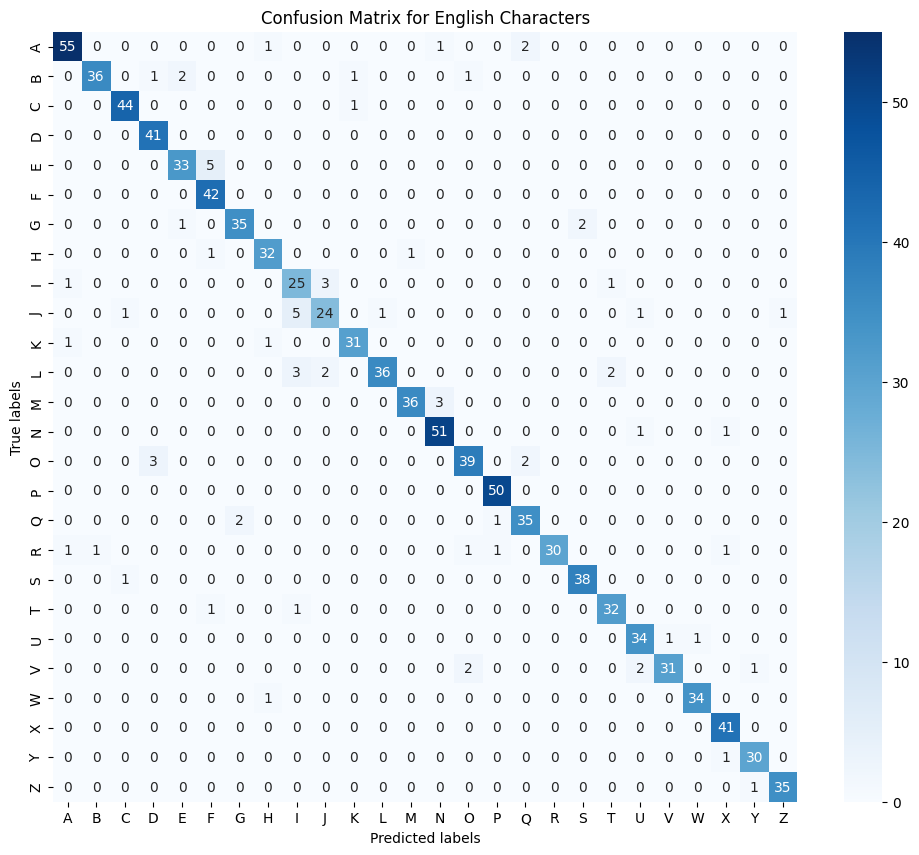

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Filter out English characters
# Assuming 0-25 are English character class indices
english_indices = (all_labels < 26)
english_labels = all_labels[english_indices]
english_preds = all_preds[english_indices]

# Confusion matrix for English characters
conf_matrix_english = confusion_matrix(english_labels.numpy(), english_preds.numpy(), labels=range(26))

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_english, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names_en, yticklabels=class_names_en)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for English Characters')
plt.show()


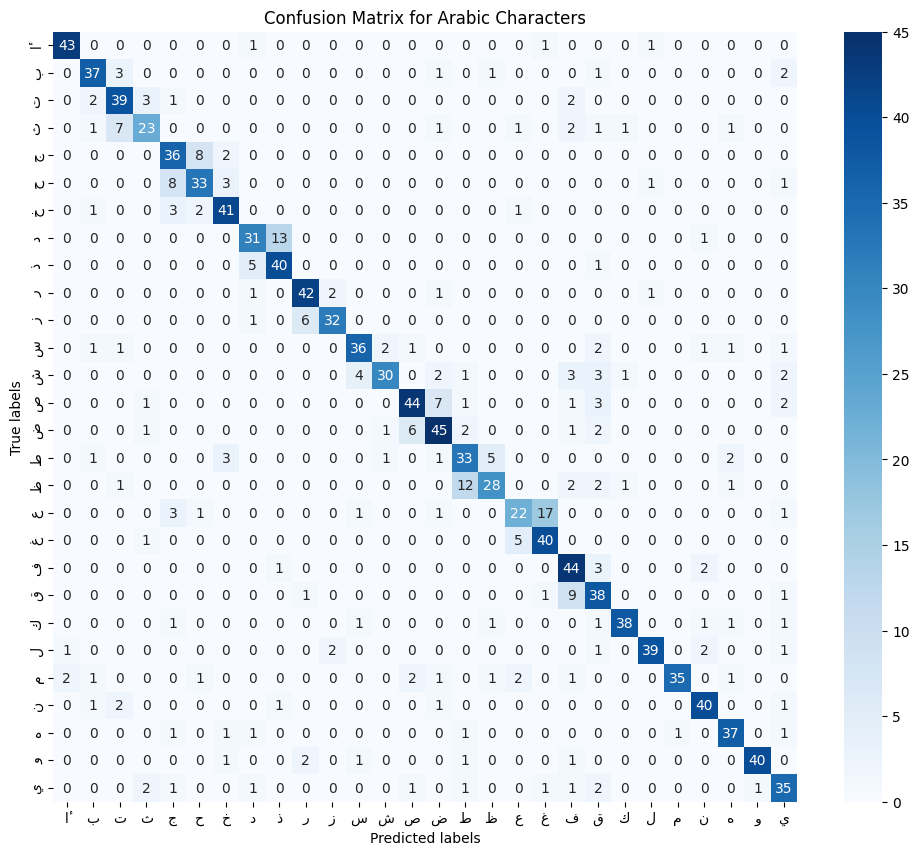

In [33]:
# Filter out Arabic characters
# Assuming Arabic character class indices are from 26 to 53
arabic_indices = (all_labels >= 26) & (all_labels < 54)
arabic_labels = all_labels[arabic_indices]
arabic_preds = all_preds[arabic_indices]

# Confusion matrix for Arabic characters
conf_matrix_arabic = confusion_matrix(arabic_labels.numpy() - 26, arabic_preds.numpy() - 26, labels=range(len(class_names_ar)))

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_arabic, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names_ar, yticklabels=class_names_ar)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Arabic Characters')
plt.show()


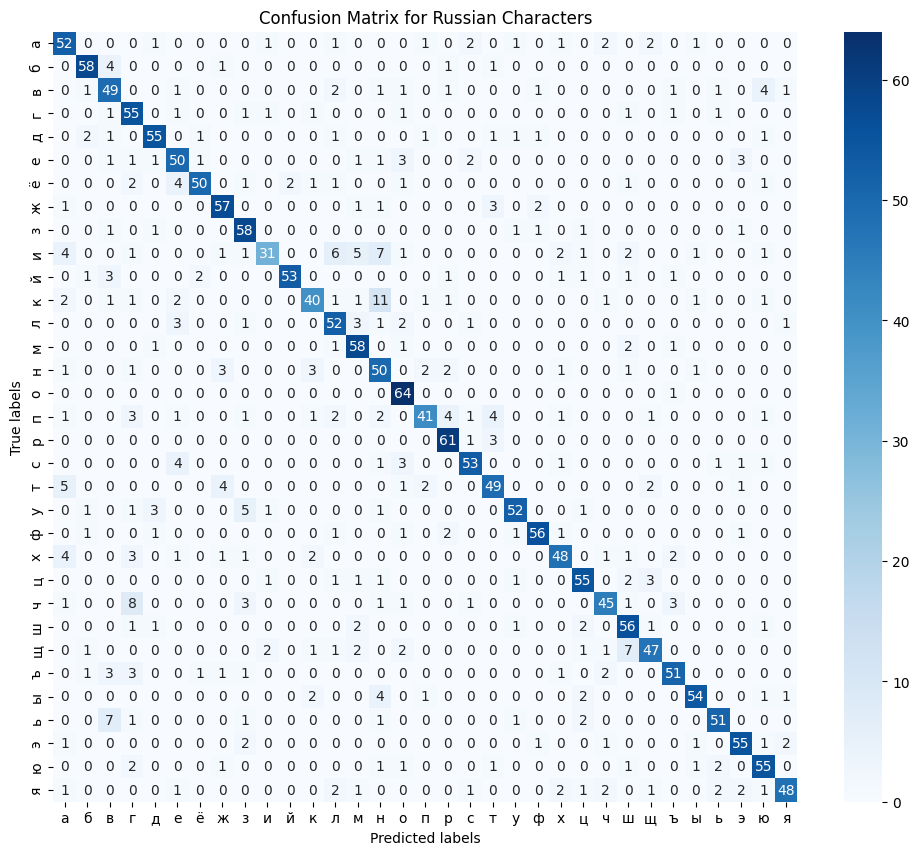

In [34]:
# Filter out Russian characters
# Assuming Russian character class indices start from 54
russian_indices = (all_labels >= 54)
russian_labels = all_labels[russian_indices]
russian_preds = all_preds[russian_indices]

# Confusion matrix for Russian characters
conf_matrix_russian = confusion_matrix(russian_labels.numpy() - 54, russian_preds.numpy() - 54, labels=range(len(class_names_ru)))

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_russian, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names_ru, yticklabels=class_names_ru)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Russian Characters')
plt.show()


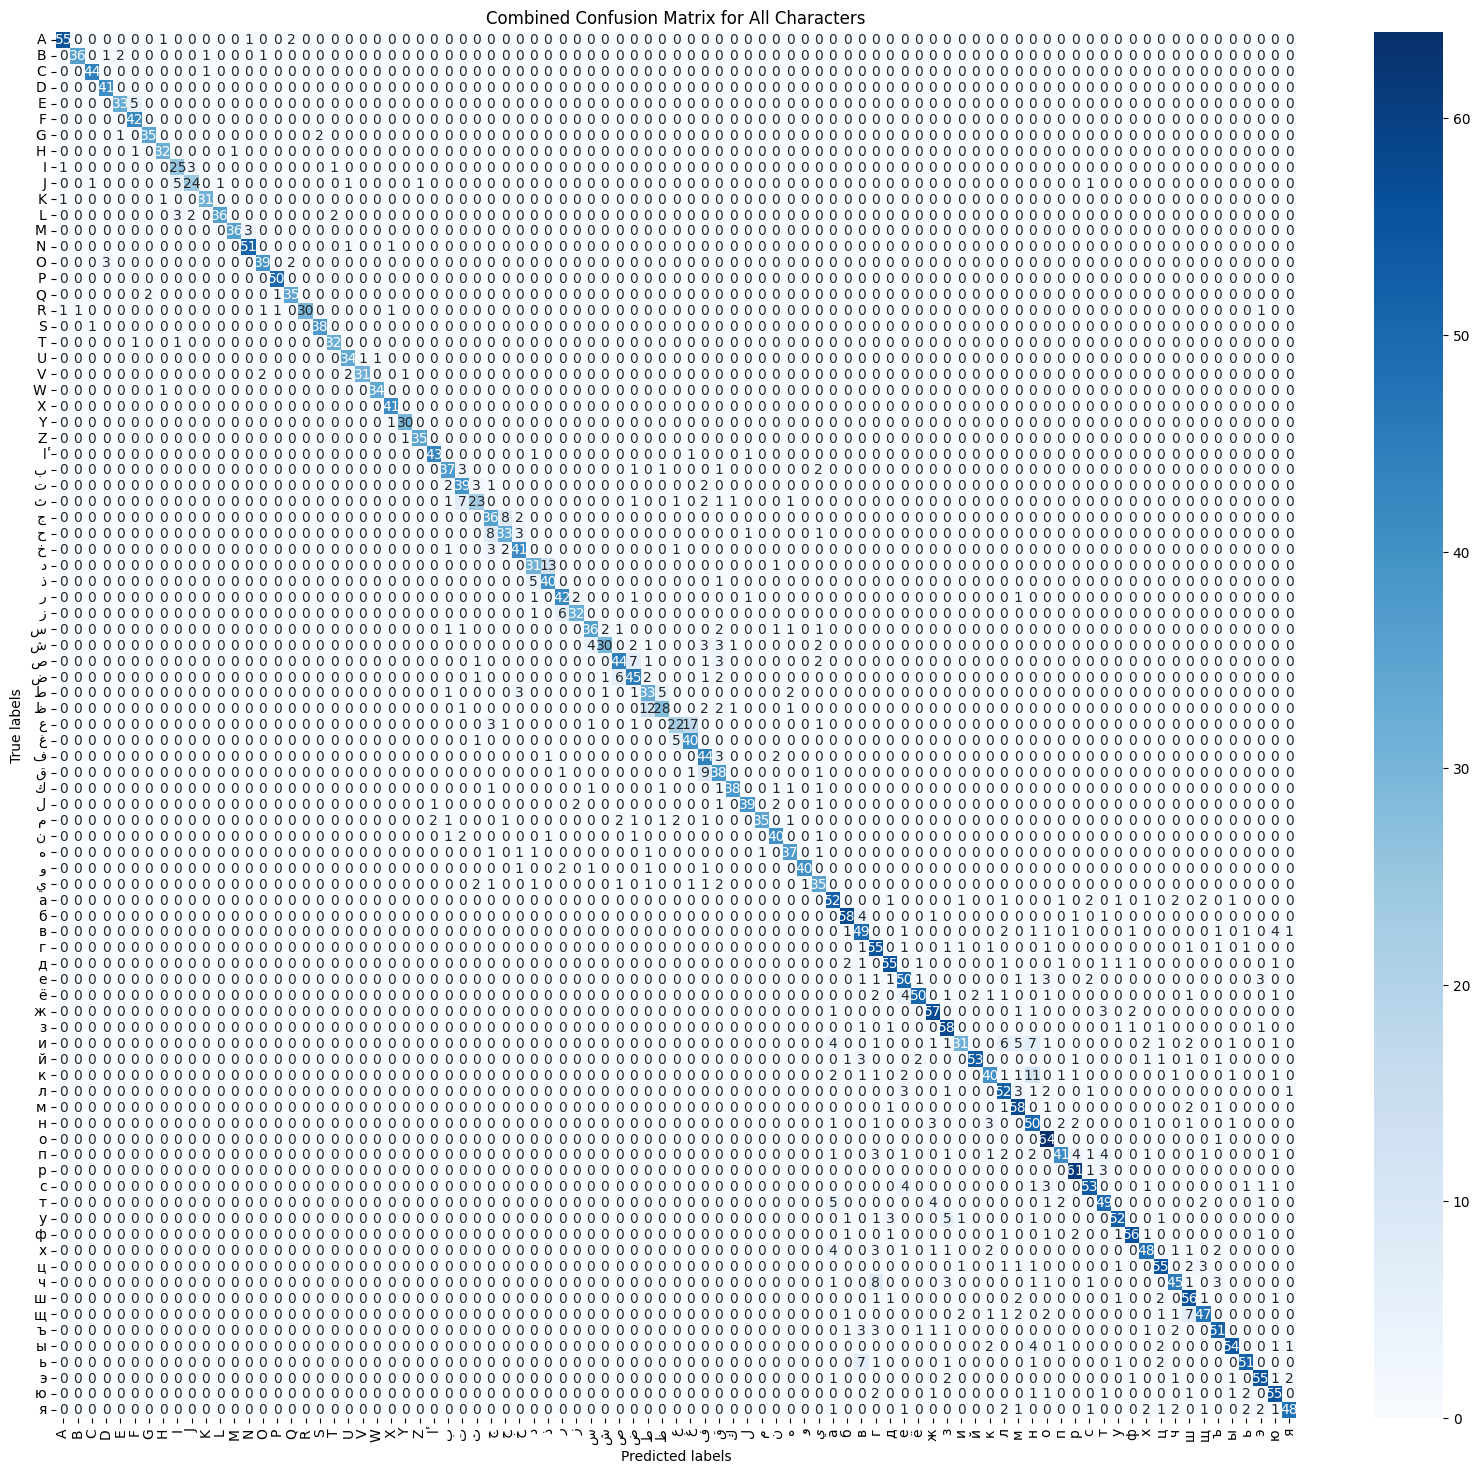

In [35]:
# Combined confusion matrix for all characters
conf_matrix_combined = confusion_matrix(all_labels.numpy(), all_preds.numpy(), labels=range(len(class_names)))

# Plotting
plt.figure(figsize=(20, 18))
sns.heatmap(conf_matrix_combined, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Combined Confusion Matrix for All Characters')
plt.show()


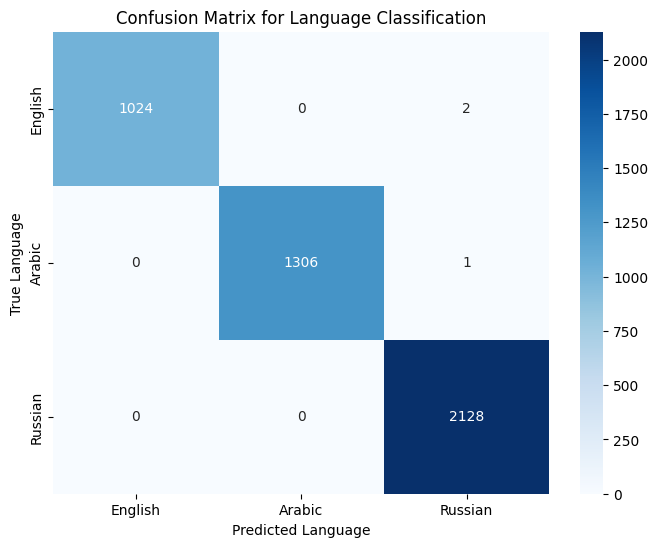

In [36]:
# Function to convert labels into language categories
def convert_to_language_category(labels):
    language_labels = labels.clone()
    language_labels[labels < 26] = 0  # English
    language_labels[(labels >= 26) & (labels < 54)] = 1  # Arabic
    language_labels[labels >= 54] = 2  # Russian
    return language_labels

# Convert labels and predictions to language categories
language_labels = convert_to_language_category(all_labels)
language_preds = convert_to_language_category(all_preds)

# Confusion matrix for language classification
conf_matrix_language = confusion_matrix(language_labels.numpy(), language_preds.numpy(), labels=[0, 1, 2])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_language, annot=True, fmt='g', cmap='Blues',
            xticklabels=['English', 'Arabic', 'Russian'], yticklabels=['English', 'Arabic', 'Russian'])
plt.xlabel('Predicted Language')
plt.ylabel('True Language')
plt.title('Confusion Matrix for Language Classification')
plt.show()
